## **MACHINE LEARNING FOR REGRESSION MODEL**
### **Machine Learning Models for Regression Analysis: KNN and SVM for Predicting Systolic Blood Pressure**

Predicting **Systolic Blood Pressure (SBP)** is an important task in medical research and clinical decision-making. SBP is a continuous variable representing the pressure exerted on arterial walls during heart contraction. Because it is continuous, this problem falls under **regression analysis** rather than classification. Machine learning regression models are particularly useful when the relationship between predictors (such as age, BMI, creatinine level, or HIV status) and SBP is complex and potentially non-linear. Two powerful machine learning approaches for regression are **K-Nearest Neighbors (KNN) Regression** and **Support Vector Machine (SVM) Regression**, also known as Support Vector Regression (SVR).

### 1. K-Nearest Neighbors (KNN) Regression

KNN is a non-parametric, instance-based learning algorithm. Unlike traditional regression models that estimate explicit parameters, KNN makes predictions based on the similarity between observations in the dataset.

In KNN regression, the predicted SBP for a new observation is calculated as the average (or weighted average) of the SBP values of the *k* closest observations in the training data. Closeness is usually determined using distance metrics such as Euclidean distance.

The main idea is simple:

* Identify the *k* nearest data points to the new individual based on predictor variables.
* Compute the mean SBP of these neighbors.
* Use that mean as the predicted SBP.

Key characteristics of KNN regression include:

* It does not assume linearity between predictors and SBP.
* It is sensitive to the scale of variables; therefore, feature scaling (e.g., StandardScaler) is essential.
* The choice of *k* significantly affects performance. Small *k* may cause overfitting, while large *k* may lead to underfitting.

Advantages of KNN include simplicity and flexibility in capturing nonlinear patterns. However, it can be computationally expensive for large datasets and sensitive to irrelevant features.

### 2. Support Vector Machine (SVM) Regression

Support Vector Regression (SVR) is a powerful supervised learning algorithm derived from Support Vector Machines. Unlike KNN, SVR is a margin-based method that attempts to find a function that best approximates the relationship between predictors and SBP while maintaining model simplicity.

The core idea of SVR is to fit a regression line (or hyperplane) such that most data points lie within a specified error margin, called epsilon (ε). Instead of minimizing squared errors directly, SVR minimizes a loss function that penalizes errors larger than ε while ignoring smaller errors.

Important components of SVR include:

* The kernel function, which allows modeling nonlinear relationships. Common kernels include linear, polynomial, and radial basis function (RBF).
* The regularization parameter (C), which controls the trade-off between model complexity and training error.
* The epsilon parameter (ε), which defines the acceptable error margin.

SVR is particularly effective when:

* The relationship between predictors and SBP is nonlinear.
* The dataset has high dimensionality.
* Robust performance is required even with complex data structures.

However, SVR requires careful tuning of hyperparameters and can be computationally intensive for very large datasets.

### 3. Comparison of KNN and SVM for SBP Prediction

Both KNN and SVR are suitable for predicting systolic blood pressure, especially when relationships between clinical variables and SBP are not strictly linear. KNN relies on local similarity and performs well when similar patients tend to have similar SBP levels. In contrast, SVR constructs a global model that optimally balances prediction error and model complexity.

In practice:

* KNN may perform better with smaller datasets and smooth data patterns.
* SVR often provides better generalization when nonlinear relationships exist.
* Feature scaling is crucial for both models.
* Model performance should be evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

### Conclusion

KNN regression and Support Vector Regression are powerful machine learning techniques for predicting systolic blood pressure. KNN is intuitive and locally adaptive, while SVR is mathematically rigorous and capable of modeling complex nonlinear relationships. Proper preprocessing, hyperparameter tuning, and model evaluation are essential to obtain accurate and reliable SBP predictions in clinical research settings.


### **Load the Needeed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Initialize Data Importation**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving htn_dat.csv to htn_dat.csv


#### **Read the Data as CSV data frame**

In [ ]:
df = pd.read_csv('htn_dat.csv')
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120
0,16097,60,90,NaN,28.000000,0.0,0,NaN,NaN,338,1,1,0,NaN,0.924379,0
1,930,75,110,27.339912,26.458590,1.0,0,-3.9,0.0,439,1,1,1,5.421770e-02,1.163862,0
2,6877,60,80,17.689789,42.951405,0.0,0,-3.2,NaN,752,1,1,0,-3.597409e-01,0.721148,0
3,36464,60,90,19.854080,50.149212,1.0,1,NaN,NaN,526,1,1,1,NaN,0.829452,0
4,36180,60,100,21.295294,30.554415,0.0,1,-0.4,NaN,215,1,1,0,-1.000000e-07,0.856046,0


### **View Variables Definition and their Measurements**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary
variables_dict = pd.DataFrame({
    'Variable': [
        'ID', 'DBP', 'SBP', 'BMI', 'age', 'married', 'male.gender',
        'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive',
        'urban.clinic', 'log_creat_centered', 'IPW_weight', 'SBP_ge120'
    ],
    'Type': [
        'Integer', 'Integer', 'Integer', 'Float', 'Float', 'Binary', 'Binary',
        'Float', 'Binary', 'Integer', 'Binary', 'Binary',
        'Binary', 'Float', 'Float', 'Binary'
    ],
    'Description': [
        'Unique patient identifier',
        'Diastolic blood pressure',
        'Systolic blood pressure',
        'Body Mass Index',
        'Patient age in years',
        'Marital status',
        'Gender indicator',
        'Hemoglobin (centered around mean)',
        'Advanced HIV disease status',
        'Survival time in days',
        'Event indicator (hypertension onset)',
        'Antiretroviral therapy naive status',
        'Clinic location',
        'Log-transformed creatinine (centered)',
        'Inverse probability weighting weight',
        'Hypertension indicator (SBP ≥ 120 mmHg)'
    ],
    'Values / Units': [
        'Unique ID',
        'mmHg',
        'mmHg',
        'kg/m²',
        'Years',
        '1 = Married, 0 = Not married',
        '1 = Male, 0 = Female',
        'g/dL (mean-centered)',
        '1 = Yes, 0 = No, NA = Missing',
        'Days',
        '1 = Event occurred, 0 = Censored',
        '1 = Naive, 0 = Experienced',
        '1 = Urban, 0 = Rural',
        'log(mg/dL) (centered)',
        'Continuous weight',
        '1 = Hypertensive, 0 = Normotensive'
    ],
    'Notes': [
        'The-identified patient ID',
        'Normal range: 60–80 mmHg',
        'Primary outcome variable',
        'Missing values present (NA)',
        'Range: 16–80 years',
        'Self-reported status',
        'Biological sex assigned at birth',
        'Centered = raw value minus cohort mean',
        'CD4 <200 cells/μL or WHO Stage 3/4',
        'Time to hypertension diagnosis or censoring',
        'Primary outcome for survival analysis',
        'Never received ARVs before enrollment',
        'Based on clinic administrative location',
        'Centered for modeling stability',
        'For causal inference adjustment',
        'Clinical threshold per WHO guidelines'
    ]
})

# Display as styled table
display(HTML(
    variables_dict.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
ID,Integer,Unique patient identifier,Unique ID,The-identified patient ID
DBP,Integer,Diastolic blood pressure,mmHg,Normal range: 60–80 mmHg
SBP,Integer,Systolic blood pressure,mmHg,Primary outcome variable
BMI,Float,Body Mass Index,kg/m²,Missing values present (NA)
age,Float,Patient age in years,Years,Range: 16–80 years
married,Binary,Marital status,"1 = Married, 0 = Not married",Self-reported status
male.gender,Binary,Gender indicator,"1 = Male, 0 = Female",Biological sex assigned at birth
hgb_centered,Float,Hemoglobin (centered around mean),g/dL (mean-centered),Centered = raw value minus cohort mean
adv_HIV,Binary,Advanced HIV disease status,"1 = Yes, 0 = No, NA = Missing",CD4 <200 cells/μL or WHO Stage 3/4
survtime,Integer,Survival time in days,Days,Time to hypertension diagnosis or censoring


### **Data Cleaning and Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   DBP                 4999 non-null   int64  
 2   SBP                 4999 non-null   int64  
 3   BMI                 4329 non-null   float64
 4   age                 4999 non-null   float64
 5   married             4835 non-null   float64
 6   male.gender         4999 non-null   int64  
 7   hgb_centered        3605 non-null   float64
 8   adv_HIV             3038 non-null   float64
 9   survtime            4999 non-null   int64  
 10  event               4999 non-null   int64  
 11  arv_naive           4999 non-null   int64  
 12  urban.clinic        4999 non-null   int64  
 13  log_creat_centered  3461 non-null   float64
 14  IPW_weight          4999 non-null   float64
 15  SBP_ge120           4999 non-null   int64  
dtypes: flo

### **Check for the Missing Obervations**

In [ ]:
df.isna().sum()

,0
ID,0
DBP,0
SBP,0
BMI,670
age,0
married,164
male.gender,0
hgb_centered,1394
adv_HIV,1961
survtime,0


### **Visualize the Number of Missing Obervations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Calculate percentages
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})
missing_df

,Variable,Missing Count,Missing Percentage
0,BMI,670,13.402681
1,married,164,3.280656
2,hgb_centered,1394,27.885577
3,adv_HIV,1961,39.227846
4,log_creat_centered,1538,30.766153


In [ ]:
# Sort by missing percentage
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)
missing_df

,Variable,Missing Count,Missing Percentage
3,adv_HIV,1961,39.227846
4,log_creat_centered,1538,30.766153
2,hgb_centered,1394,27.885577
0,BMI,670,13.402681
1,married,164,3.280656


#### **Plot the Bar Chart of the Missing Values**

/tmp/ipython-input-1663319121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')


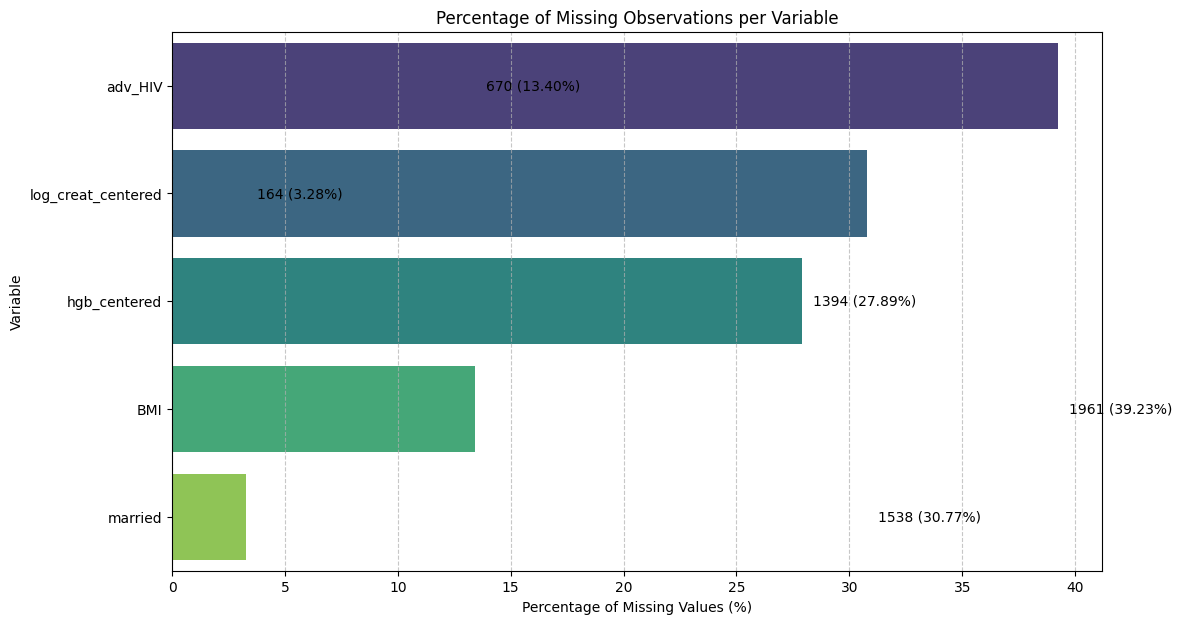

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Observations per Variable')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Variable')

# Add frequency and percentage labels to the bars
for index, row in missing_df.iterrows():
    plt.text(row['Missing Percentage'] + 0.5, index,
             f"{row['Missing Count']} ({row['Missing Percentage']:.2f}%)",
             color='black', va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Delete with Missing Values**

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,0
age,0
married,0
male.gender,0
hgb_centered,0
adv_HIV,0
survtime,0


### **Check the Sample Size after Deleting Rows with Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2326 non-null   int64  
 1   DBP                 2326 non-null   int64  
 2   SBP                 2326 non-null   int64  
 3   BMI                 2326 non-null   float64
 4   age                 2326 non-null   float64
 5   married             2326 non-null   float64
 6   male.gender         2326 non-null   int64  
 7   hgb_centered        2326 non-null   float64
 8   adv_HIV             2326 non-null   float64
 9   survtime            2326 non-null   int64  
 10  event               2326 non-null   int64  
 11  arv_naive           2326 non-null   int64  
 12  urban.clinic        2326 non-null   int64  
 13  log_creat_centered  2326 non-null   float64
 14  IPW_weight          2326 non-null   float64
 15  SBP_ge120           2326 non-null   int64  
dtypes: float64(

### **Identify X [Features] and Y [Systolic Blood Pressure]**

In [ ]:
X = df[['age', 'BMI', 'IPW_weight', 'hgb_centered', 'log_creat_centered', 'survtime', 'urban.clinic', 'married', 'male.gender', 'adv_HIV']]
y = df['SBP']

In [ ]:
X.head()

,age,BMI,IPW_weight,hgb_centered,log_creat_centered,survtime,urban.clinic,married,male.gender,adv_HIV
1,26.458590,27.339912,1.163862,-3.90,0.054218,439,1,1.0,0,0.0
11,40.531143,23.068195,0.856046,-3.93,0.223143,914,0,1.0,1,1.0
12,32.919918,21.989893,0.916506,-1.30,-0.278203,23,1,1.0,0,1.0
17,36.596851,20.983988,0.667708,1.10,0.013621,356,0,0.0,1,0.0
22,42.488705,15.396691,0.829452,-0.80,0.068993,439,1,1.0,1,1.0


In [ ]:
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


### **Data Partitioning for Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Train the KNN Model for Regression Analysis**

#### **Load the Reqquired Functionality and Libraries**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### **Initialize the the Default KNN Regressor model**

In [ ]:
k_neighbors_regressor = KNeighborsRegressor()

In [ ]:
k_neighbors_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
### Exxtract the  number of neighbors
k_neighbors_regressor.n_neighbors

5

# **Train the Optimize KNN model**

## **Optimize KNN Regressor (n_neighbors)**
Optimize the KNN Regressor by tuning the `n_neighbors` hyperparameter using GridSearchCV to find the best value for `k`.

**Reasoning**:
To optimize the KNN Regressor, I will import `GridSearchCV` and `KNeighborsRegressor`, define a parameter grid for `n_neighbors`, initialize `GridSearchCV` with these components, fit it to the training data, and then extract and print the best `n_neighbors` and store the best estimator.

## Evaluate Optimized KNN Regressor
Make predictions on the test data using the optimized KNN regressor, calculate regression metrics, and visualize its performance.

**Reasoning**:
First, we need to make predictions on the test data using the optimized KNN regressor (`best_knn_regressor`) and then calculate and print the regression metrics (MAE, MSE, RMSE, R-squared) to evaluate its performance, as this aligns with the first part of the instructions.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 2. Define a parameter grid for n_neighbors
param_grid = {'n_neighbors': range(1, 31)}

# 3. Initialize GridSearchCV
# Using 'neg_mean_squared_error' because GridSearchCV maximizes the score, so we minimize negative MSE.
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)

# 4. Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# 5. Print the best n_neighbors found by GridSearchCV
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

# 6. Store the best estimator from GridSearchCV
best_knn_regressor = grid_search.best_estimator_
print("Optimized KNN Regressor stored as 'best_knn_regressor'.")

Best n_neighbors: 29
Optimized KNN Regressor stored as 'best_knn_regressor'.


#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data using the optimized KNN regressor
y_pred_optimized = best_knn_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Calculate Mean Squared Error (MSE)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Calculate Root Mean Squared Error (RMSE)
rmse_optimized = np.sqrt(mse_optimized)

# Calculate R-squared score
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the results for the optimized model
print("--- Optimized KNN Regressor Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.4f}")
print(f"R-squared (R2) Score: {r2_optimized:.4f}")

--- Optimized KNN Regressor Metrics ---
Mean Absolute Error (MAE): 11.6865
Mean Squared Error (MSE): 262.9615
Root Mean Squared Error (RMSE): 16.2161
R-squared (R2) Score: -0.0114


### **Plot the Optimized Results**

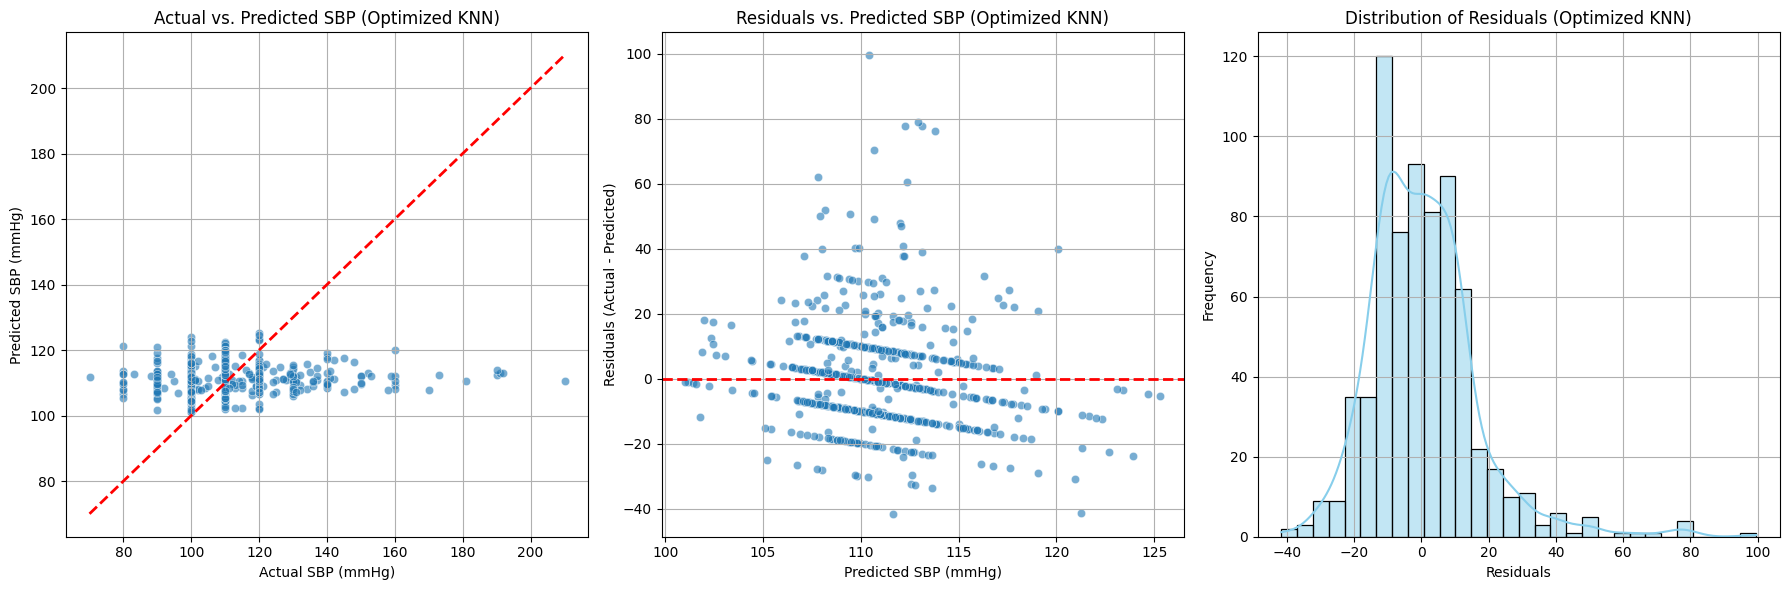

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (Optimized KNN)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_optimized = y_test - y_pred_optimized

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_optimized, y=residuals_optimized, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (Optimized KNN)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_optimized, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (Optimized KNN)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Support Vectors Machines (SVM)**

In [ ]:
from sklearn.svm import SVR

# Instantiate an SVR model object
svr_model = SVR()
print("SVR model instantiated.")

# Train the SVR model using the training data
svr_model.fit(X_train, y_train)
print("SVR model trained successfully.")

SVR model instantiated.
SVR model trained successfully.


### **Prediction**

In [ ]:
y_pred_svr = svr_model.predict(X_test)
print("Predictions on test set using SVR model have been made.")

Predictions on test set using SVR model have been made.


### **Calculate the Performance Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Calculate Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Calculate Root Mean Squared Error (RMSE)
rmse_svr = np.sqrt(mse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_pred_svr)

# Print the results for the SVR model
print("--- SVR Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared (R2) Score: {r2_svr:.4f}")

--- SVR Model Metrics ---
Mean Absolute Error (MAE): 11.2053
Mean Squared Error (MSE): 262.0592
Root Mean Squared Error (RMSE): 16.1882
R-squared (R2) Score: -0.0079


### **Regression Plots for SVM Model**

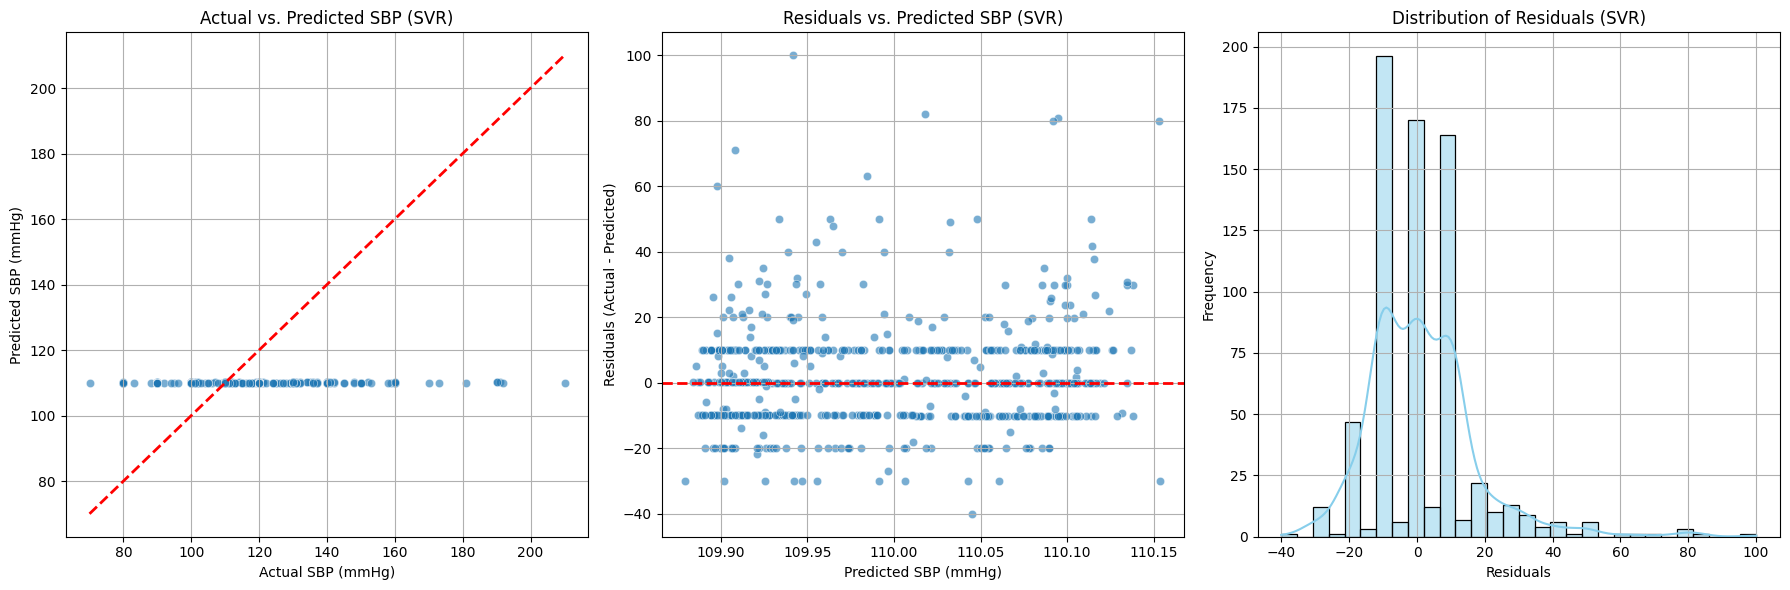

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (SVR)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_svr = y_test - y_pred_svr

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_svr, y=residuals_svr, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (SVR)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_svr, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (SVR)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Model's Performance Comparison**

In [ ]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Optimized KNN': [
        mae_optimized,
        mse_optimized,
        rmse_optimized,
        r2_optimized
    ],
    'SVR': [
        mae_svr,
        mse_svr,
        rmse_svr,
        r2_svr
    ]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data,
                          index=['MAE', 'MSE', 'RMSE', 'R-squared'])

In [ ]:
# Print the comparison table
metrics_df

,Optimized KNN,SVR
MAE,11.686543,11.205320
MSE,262.961465,262.059173
RMSE,16.216087,16.188242
R-squared,-0.011354,-0.007884


The performance of the optimized K-Nearest Neighbors (KNN) regression model and the Support Vector Regression (SVR) model was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

The optimized KNN model produced an MAE of 11.69, an MSE of 262.96, and an RMSE of 16.22. Its R-squared value was −0.011. The SVR model yielded slightly better performance, with an MAE of 11.21, an MSE of 262.06, and an RMSE of 16.19. Its R-squared value was −0.008.

When comparing error metrics, SVR consistently performs marginally better than the optimized KNN model. The MAE is lower for SVR, indicating that, on average, its absolute prediction errors are slightly smaller. Similarly, SVR has lower MSE and RMSE values, meaning it produces slightly smaller squared errors and overall prediction deviations. Although the differences are small, SVR demonstrates more accurate predictions across all three error-based metrics.

However, both models have negative R-squared values. A negative R-squared indicates that the models perform worse than a simple baseline model that predicts the mean systolic blood pressure for all observations. This suggests that neither model captures sufficient explanatory power from the predictor variables. The low R-squared values indicate limited predictive strength and poor model fit.

Between the two models, SVR is recommended as the better model because it consistently produces lower prediction errors and a slightly improved R-squared value compared to KNN. Additionally, SVR is generally more robust in handling nonlinear relationships and high-dimensional data, which may be beneficial in medical datasets where relationships between predictors and systolic blood pressure are complex.

Nevertheless, the overall weak performance of both models suggests that further improvement is needed. Potential strategies include feature engineering, removal of irrelevant predictors, additional hyperparameter tuning, inclusion of more clinically relevant variables, or trying alternative regression models such as Random Forest or Gradient Boosting.


### **Feature Engineering and Determination of the Best Features for Predicting Systolic Blood Pressure**

To standardize the features as required by the subtask, I need to import StandardScaler, instantiate it, fit it on the training data, and then transform both training and test data.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features X_train and X_test have been standardized.")

Features X_train and X_test have been standardized.


## Re-train Optimized KNN on Scaled Data

### Subtask:
Re-train the `best_knn_regressor` (with n_neighbors=29) using the now scaled training data to establish a baseline for feature importance calculation.


**Reasoning**:
To re-train the `best_knn_regressor` model with the scaled training data as instructed, I need to call its `fit` method using `X_train_scaled` and `y_train`.



In [ ]:
best_knn_regressor.fit(X_train_scaled, y_train)
print("Optimized KNN Regressor has been re-trained on scaled data.")

Optimized KNN Regressor has been re-trained on scaled data.


## Calculate Feature Importance for KNN using Permutation Importance

### Subtask:
Use `sklearn.inspection.permutation_importance` to determine the importance of each feature for the re-trained KNN model. This method measures the decrease in a model's score when a single feature is randomly shuffled.


**Reasoning**:
To calculate feature importance for the re-trained KNN model using permutation importance, I need to import the necessary function, apply it to the scaled test data, extract the mean importances, and then organize these into a DataFrame with their corresponding feature names.



In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calculate permutation importance for the optimized KNN regressor
perm_importance = permutation_importance(
    best_knn_regressor,
    X_test_scaled,
    y_test,
    scoring='neg_mean_squared_error', # Using negative MSE as it's common for regression and grid search used it
    n_repeats=30,  # Number of times to permute a feature
    random_state=42
)

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature importance calculation complete and stored in 'feature_importances_df'.")
print(feature_importances_df)

Feature importance calculation complete and stored in 'feature_importances_df'.
              Feature  Importance
1                 BMI   12.931339
8         male.gender    8.361012
0                 age    5.503222
3        hgb_centered    3.354623
7             married    1.044377
4  log_creat_centered    0.763634
2          IPW_weight    0.330213
6        urban.clinic    0.170086
5            survtime    0.066392
9             adv_HIV   -1.652792


## Visualize Feature Importances

### Subtask:
Create a bar plot to visually represent the importance of each feature, making it easier to identify the 'best' or most relevant features.


**Reasoning**:
To visualize the feature importances as requested, I will create a bar plot using `seaborn.barplot` from the `feature_importances_df`, setting the appropriate axes and labels for clarity.



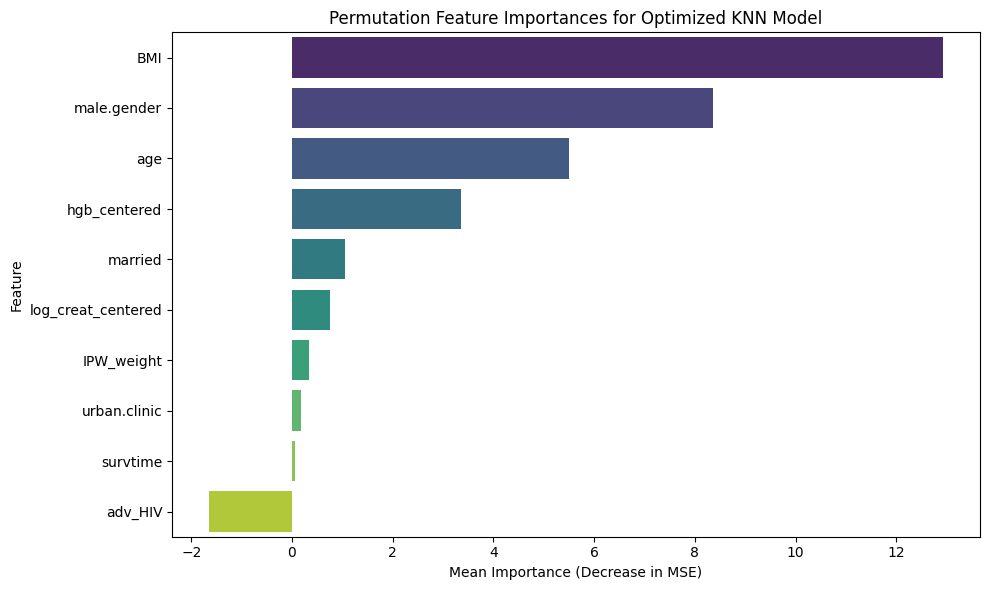

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis', hue='Feature', legend=False)
plt.title('Permutation Feature Importances for Optimized KNN Model')
plt.xlabel('Mean Importance (Decrease in MSE)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Interpreting Feature Importances

Based on the permutation importance analysis for the optimized KNN model, we can observe the following ranking of features by their mean importance (decrease in Mean Squared Error):

1.  **BMI (Body Mass Index)**: This feature shows the highest importance, indicating it is the most influential predictor in the model. A higher permutation importance value suggests that shuffling BMI significantly degrades the model's performance, implying its strong relationship with SBP.
2.  **male.gender**: Gender appears as the second most important feature, suggesting that it plays a substantial role in predicting SBP.
3.  **age**: Age is the third most important predictor, which is expected as SBP often correlates with age.
4.  **hgb_centered (Hemoglobin)**: Hemoglobin levels, when centered, also contribute significantly to the SBP prediction.
5.  **married, log_creat_centered, IPW_weight, urban.clinic, survtime**: These features have progressively lower importance scores, indicating a moderate to minor impact on the model's predictive capability.
6.  **adv_HIV (Advanced HIV disease status)**: This feature has a negative importance score, which suggests that including it as a predictor actually slightly *worsens* the model's performance, or at best, has no positive impact. In some cases, features with very low or negative importance might be considered for removal to simplify the model and potentially improve generalization.

This analysis helps in understanding which clinical variables are most relevant for predicting SBP using the KNN model and can guide further feature selection or engineering efforts.

## Select Top Features

### Subtask:
Based on the permutation importances, select a subset of the most important features to potentially improve model performance and reduce noise.


**Reasoning**:
Based on the `feature_importances_df`, I will select features with positive importance scores and store their names in the `selected_features` list, as per the instructions.



In [ ]:
import pandas as pd

# Assuming feature_importances_df is already defined from the previous step
# Select features with positive importance scores
selected_features_df = feature_importances_df[feature_importances_df['Importance'] > 0]

# Extract the names of the selected features
selected_features = selected_features_df['Feature'].tolist()

print(f"Selected features based on positive importance: {selected_features}")

Selected features based on positive importance: ['BMI', 'male.gender', 'age', 'hgb_centered', 'married', 'log_creat_centered', 'IPW_weight', 'urban.clinic', 'survtime']


## Retrain KNN with Selected Features

### Subtask:
Train a new KNN model (or re-train the optimized one) using only the selected, most important features.


## Prepare Data with Selected Features and Re-train KNN

### Subtask:
Prepare the training and test data using only the previously identified `selected_features`, scale them, and then re-train a `KNeighborsRegressor` with the optimal `n_neighbors` value.

**Reasoning**:
To fulfill the subtask instructions, I will first filter the training and test features using `selected_features`, then apply `StandardScaler` to these filtered datasets, and finally instantiate and fit a `KNeighborsRegressor` using the optimal `n_neighbors` value to the scaled data.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# 1. Filter X_train and X_test to include only the selected_features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply StandardScaler to these filtered DataFrames
scaler_selected = StandardScaler()
X_train_scaled_selected = scaler_selected.fit_transform(X_train_selected)
X_test_scaled_selected = scaler_selected.transform(X_test_selected)

print("X_train and X_test filtered and scaled with selected features.")

# 2. Instantiate a new KNeighborsRegressor model with the optimal n_neighbors value (29)
# The optimal n_neighbors was found in a previous step.
knn_selected_features = KNeighborsRegressor(n_neighbors=29)

# 3. Fit this new KNN model to the X_train_scaled_selected and y_train data
knn_selected_features.fit(X_train_scaled_selected, y_train)

print("KNN model re-trained successfully using only selected and scaled features.")

X_train and X_test filtered and scaled with selected features.
KNN model re-trained successfully using only selected and scaled features.


## Evaluate KNN with Selected Features

### Subtask:
Evaluate the performance of the KNN model trained with only the selected features. This involves making predictions on the scaled test data (with selected features) and calculating regression metrics such as MAE, MSE, RMSE, and R-squared.

**Reasoning**:
To evaluate the re-trained KNN model, I need to make predictions on the `X_test_scaled_selected` data and then calculate the standard regression metrics (MAE, MSE, RMSE, R-squared) against the true `y_test` values.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the scaled test data with selected features
y_pred_selected_features = knn_selected_features.predict(X_test_scaled_selected)

# Calculate Mean Absolute Error (MAE)
mae_selected_features = mean_absolute_error(y_test, y_pred_selected_features)

# Calculate Mean Squared Error (MSE)
mse_selected_features = mean_squared_error(y_test, y_pred_selected_features)

# Calculate Root Mean Squared Error (RMSE)
rmse_selected_features = np.sqrt(mse_selected_features)

# Calculate R-squared score
r2_selected_features = r2_score(y_test, y_pred_selected_features)

# Print the results for the KNN model with selected features
print("--- KNN Regressor with Selected Features Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_selected_features:.4f}")
print(f"Mean Squared Error (MSE): {mse_selected_features:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_selected_features:.4f}")
print(f"R-squared (R2) Score: {r2_selected_features:.4f}")

--- KNN Regressor with Selected Features Metrics ---
Mean Absolute Error (MAE): 11.2961
Mean Squared Error (MSE): 241.0612
Root Mean Squared Error (RMSE): 15.5261
R-squared (R2) Score: 0.0729


## Visualize KNN with Selected Features Performance

### Subtask:
Create a set of plots to visually inspect the performance of the KNN model trained with selected features. This includes an actual vs. predicted plot, a residuals vs. predicted plot, and a distribution of residuals plot.

**Reasoning**:
To visualize the performance of the KNN model with selected features, I will create three plots: actual vs. predicted, residuals vs. predicted, and a distribution of residuals, similar to previous visualization steps.



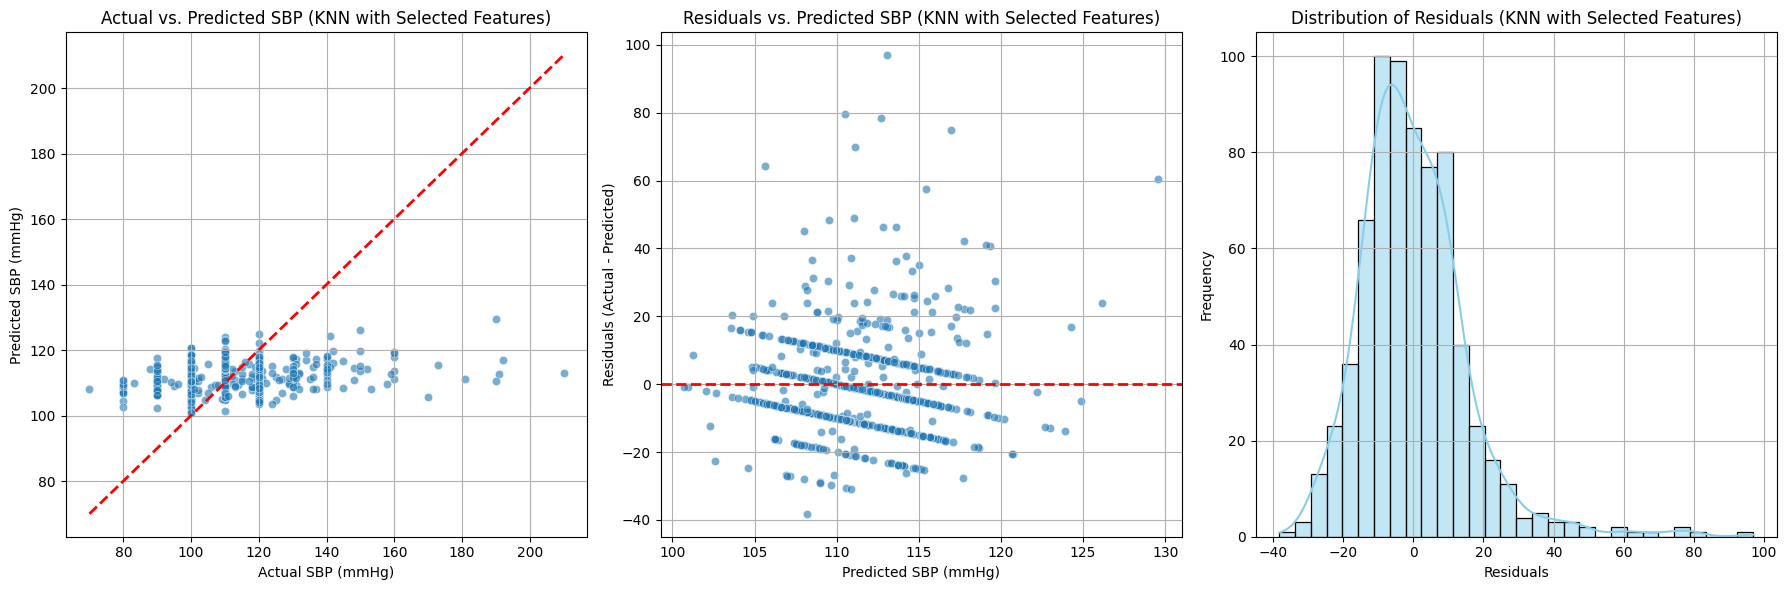

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_selected_features, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted SBP (KNN with Selected Features)')
plt.xlabel('Actual SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.grid(True)

# Calculate residuals
residuals_selected_features = y_test - y_pred_selected_features

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_selected_features, y=residuals_selected_features, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted SBP (KNN with Selected Features)')
plt.xlabel('Predicted SBP (mmHg)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_selected_features, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (KNN with Selected Features)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The features of both the training (`X_train`) and test (`X_test`) datasets were successfully standardized using `StandardScaler`.
*   The optimized KNN Regressor (with `n_neighbors=29`) was re-trained on the newly scaled training data.
*   Permutation importance was calculated for the re-trained KNN model to identify influential features.
    *   `BMI` was found to be the most important feature with an importance score of approximately 12.93.
    *   `male.gender` and `age` were the next most important features, with scores of approximately 8.36 and 5.50, respectively.
    *   `adv_HIV` showed a negative importance score of approximately -1.65, suggesting that its inclusion might slightly worsen the model's performance.
*   A subset of features with positive importance scores was selected, including `BMI`, `male.gender`, `age`, `hgb_centered`, `married`, `log_creat_centered`, `IPW_weight`, `urban.clinic`, and `survtime`.
*   A new KNN model was trained using only these selected and scaled features.
*   Evaluating the KNN model with selected features on the test set yielded the following performance metrics:
    *   Mean Absolute Error (MAE): 11.2961
    *   Mean Squared Error (MSE): 241.0612
    *   Root Mean Squared Error (RMSE): 15.5261
    *   R-squared (R2) Score: 0.0729
*   Visualizations including actual vs. predicted plots, residuals vs. predicted plots, and a distribution of residuals plot were generated to assess the model's performance.

### Insights or Next Steps

*   The KNN model, even after optimization and feature selection, exhibits a relatively low R-squared score of 0.0729, indicating that the selected features explain only a small proportion of the variance in the target variable. This suggests that the model has limited predictive power for the given task and features.
*   Consider exploring alternative regression models (e.g., Tree-based models, Linear Regression, or ensemble methods) or conducting further feature engineering, potentially creating interaction terms or polynomial features, to improve the model's explanatory power and predictive accuracy.


# **Predicting CO2 Emmission Using Regression Analysis**


### **Comprehensive Notes: Random Forest & XGBoost for CO2 Emissions Prediction**

## 1. **Understanding the Problem**

### Objective
- **Task**: Regression (predicting continuous CO2 emission values)
- **Target Variable**: CO2 Emissions (likely in g/km)
- **Features**: Vehicle characteristics (Engine Size, Cylinders, Fuel Consumption, etc.)

---

## 2. **Algorithm Fundamentals**

### **A. Random Forest Regressor**

#### **Concept**
- **Ensemble Learning**: Combines multiple decision trees to improve prediction accuracy
- **Bagging (Bootstrap Aggregating)**: Each tree trained on random subset of data
- **Feature Randomness**: At each split, only random subset of features considered

#### **How It Works**
```
1. Create multiple bootstrap samples from training data
2. Build decision tree on each sample
3. At each node split, consider only √p features (p = total features)
4. Grow trees to maximum depth (no pruning)
5. Final prediction = Average of all tree predictions
```

#### **Key Advantages**
✅ Reduces overfitting compared to single decision tree  
✅ Handles non-linear relationships well  
✅ Provides feature importance scores  
✅ Robust to outliers and noise  
✅ No need for feature scaling  
✅ Handles missing values reasonably well  

#### **Key Disadvantages**
❌ Can be slow with many trees  
❌ Less interpretable than single tree  
❌ May overfit on noisy datasets  
❌ Higher memory consumption  

---

### **B. Extreme Gradient Boosting (XGBoost)**

#### **Concept**
- **Boosting Algorithm**: Sequentially builds trees where each new tree corrects errors of previous trees
- **Gradient Boosting Framework**: Uses gradient descent to minimize loss function
- **Regularization**: Built-in L1 (Lasso) and L2 (Ridge) regularization

#### **How It Works**
```
1. Start with initial prediction (mean of target)
2. Calculate residuals (actual - predicted)
3. Build tree to predict residuals
4. Update predictions: new_pred = old_pred + learning_rate * tree_prediction
5. Repeat steps 2-4 for n_estimators iterations
6. Final prediction = sum of all tree predictions
```

#### **Key Advantages**
✅ State-of-the-art performance on structured data  
✅ Faster training than traditional gradient boosting  
✅ Built-in regularization prevents overfitting  
✅ Handles missing values automatically  
✅ Parallel processing support  
✅ More memory efficient  

#### **Key Disadvantages**
❌ More hyperparameters to tune  
❌ Can overfit if not properly regularized  
❌ Less interpretable  
❌ Requires careful parameter tuning  

---

## 3. **Key Hyperparameters**

### **Random Forest**
| Parameter | Description | Typical Values |
|-----------|-------------|----------------|
| `n_estimators` | Number of trees | 100, 200, 500 |
| `max_depth` | Maximum tree depth | None, 10, 20, 30 |
| `min_samples_split` | Min samples to split node | 2, 5, 10 |
| `min_samples_leaf` | Min samples in leaf node | 1, 2, 4 |
| `max_features` | Features to consider at split | 'sqrt', 'log2', None |
| `bootstrap` | Use bootstrap samples | True, False |
| `random_state` | Reproducibility | 42, 0, 123 |

### **XGBoost**
| Parameter | Description | Typical Values |
|-----------|-------------|----------------|
| `n_estimators` | Number of boosting rounds | 100, 500, 1000 |
| `learning_rate` | Step size shrinkage | 0.01, 0.1, 0.3 |
| `max_depth` | Maximum tree depth | 3, 5, 7, 10 |
| `min_child_weight` | Min sum of instance weight | 1, 3, 5 |
| `subsample` | Row sampling ratio | 0.6, 0.8, 1.0 |
| `colsample_bytree` | Column sampling ratio | 0.6, 0.8, 1.0 |
| `gamma` | Min loss reduction for split | 0, 0.1, 0.2 |
| `reg_alpha` | L1 regularization | 0, 0.001, 0.01 |
| `reg_lambda` | L2 regularization | 1, 1.5, 2 |
| `random_state` | Reproducibility | 42, 0, 123 |

---

## 4. **Data Preprocessing Steps**

### **A. Data Cleaning**
```
1. Handle missing values
   - Drop rows/columns with too many missing values
   - Impute with mean/median/mode
   - Use advanced imputation (KNN, MICE)

2. Remove duplicates
3. Check for inconsistent data types
```

### **B. Feature Engineering**
```
1. Encode categorical variables
   - One-Hot Encoding (for nominal)
   - Label Encoding (for ordinal)
   - Target Encoding (for high cardinality)

2. Feature scaling (not required for tree-based models but useful for comparison)
   - Standardization: (x - mean) / std
   - Normalization: (x - min) / (max - min)

3. Create new features if domain knowledge allows
4. Remove highly correlated features
```

### **C. Data Splitting**
```python
# Typical split ratios
- Training: 70-80%
- Validation: 10-15%
- Testing: 10-15%

# Use stratified split if target has classes (not needed for regression)
```

---

## 5. **Model Evaluation Metrics**

### **For Regression Tasks**

| Metric | Formula | Interpretation |
|--------|---------|----------------|
| **R² Score** | 1 - (SS_res / SS_tot) | Proportion of variance explained (best = 1) |
| **RMSE** | √(1/n * Σ(y - ŷ)²) | Root Mean Square Error (lower is better) |
| **MAE** | 1/n * Σ\|y - ŷ\| | Mean Absolute Error (lower is better) |
| **MSE** | 1/n * Σ(y - ŷ)² | Mean Squared Error (lower is better) |
| **Adjusted R²** | 1 - [(1-R²)(n-1)/(n-p-1)] | R² adjusted for number of predictors |

**When to use which:**
- **R²**: Overall model fit
- **RMSE**: Penalizes large errors more (use when large errors are particularly bad)
- **MAE**: More interpretable, robust to outliers
- **MSE**: Mathematical convenience, differentiable

---

## 6. **Hyperparameter Tuning Strategies**

### **A. Grid Search**
```python
# Exhaustive search over specified parameter values
- Tests ALL combinations
- Computationally expensive
- Guaranteed to find best in grid
```

### **B. Random Search**
```python
# Random combinations from parameter distributions
- Tests random combinations
- Faster than grid search
- Often finds good enough solution
```

### **C. Bayesian Optimization**
```python
# Intelligent search using probability models
- Uses past evaluations to inform future choices
- Most efficient
- Libraries: Optuna, Hyperopt, Scikit-Optimize
```

### **D. Cross-Validation**
```python
# K-Fold Cross-Validation
- Split data into K folds
- Train on K-1 folds, validate on 1 fold
- Repeat K times
- Average performance across all folds
- Typical K: 5 or 10
```

---

## 7. **Feature Importance**

### **Random Forest**
- **Mean Decrease in Impurity (MDI)**: Average reduction in variance across all trees
- **Permutation Importance**: Measure performance drop when feature is shuffled

### **XGBoost**
- **Weight**: Number of times feature appears in trees
- **Gain**: Average gain when feature is used
- **Cover**: Average coverage when feature is used

---

## 8. **Common Pitfalls & Solutions**

| Problem | Solution |
|---------|----------|
| **Overfitting** | - Reduce max_depth<br>- Increase min_samples_split<br>- Use cross-validation<br>- Add regularization (XGBoost) |
| **Underfitting** | - Increase n_estimators<br>- Increase max_depth<br>- Reduce regularization<br>- Add more features |
| **Long training time** | - Reduce n_estimators<br>- Use parallel processing (n_jobs)<br>- Use feature selection<br>- Sample data |
| **Imbalanced predictions** | - Check data distribution<br>- Use appropriate evaluation metrics<br>- Consider transformation of target variable |

---

## 9. **Best Practices**

### **Before Training**
✅ Understand your data (EDA)  
✅ Handle missing values appropriately  
✅ Encode categorical variables  
✅ Split data before any preprocessing (avoid data leakage)  
✅ Set random_state for reproducibility  

### **During Training**
✅ Use cross-validation  
✅ Start with default parameters as baseline  
✅ Tune one parameter at a time initially  
✅ Monitor training vs validation performance  
✅ Use early stopping (XGBoost)  

### **After Training**
✅ Evaluate on test set (never seen during training)  
✅ Check residuals for patterns  
✅ Analyze feature importance  
✅ Compare multiple models  
✅ Document your process  

---

## 10. **Implementation Checklist**

```
□ Import necessary libraries
□ Load and explore data
□ Handle missing values
□ Encode categorical variables
□ Split data (train/test)
□ Define baseline model
□ Train Random Forest
□ Train XGBoost
□ Evaluate both models
□ Tune hyperparameters
□ Compare final models
□ Analyze feature importance
□ Make predictions on test set
□ Save model for deployment
```

---

## 11. **Libraries You'll Need**

```python
# Core
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# XGBoost
import xgboost as xgb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
from sklearn.inspection import permutation_importance
```

---

## 12. **Expected Workflow**

```
1. Data Loading → 2. EDA → 3. Preprocessing → 4. Train-Test Split
                                                    ↓
5. Baseline Model ← 6. Random Forest ← 7. XGBoost
       ↓                    ↓                    ↓
8. Evaluation ← 9. Hyperparameter Tuning ← 10. Cross-Validation
       ↓
11. Final Model Selection
       ↓
12. Test Set Evaluation
       ↓
13. Feature Importance Analysis
       ↓
14. Deployment/Reporting
```

---

## 13. **Performance Benchmarks**

**Typical R² Scores for Vehicle CO2 Prediction:**
- **Linear Regression**: 0.70-0.85
- **Random Forest**: 0.85-0.95
- **XGBoost**: 0.90-0.97

**Training Time (approximate for 1000 samples):**
- **Random Forest (100 trees)**: 1-5 seconds
- **XGBoost (100 estimators)**: 0.5-3 seconds

---

## 14. **When to Choose Which?**

### **Choose Random Forest when:**
- You need quick baseline model
- Interpretability is important
- Dataset is not too large
- You want to avoid overfitting easily

### **Choose XGBoost when:**
- You need maximum performance
- You have time for hyperparameter tuning
- Dataset is large
- You're participating in competitions
- You need handling of missing values

### **Read the Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CO2 Emissions.csv to CO2 Emissions.csv


### **Read the Data as a Data Frame**

In [ ]:
df = pd.read_csv('CO2 Emissions.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### **Check the Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### **Convert the Object Variables to Categorical**

In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('category')

print("Object columns converted to categorical type:")
print(df.select_dtypes(include='category').columns)

Object columns converted to categorical type:
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Make                              7385 non-null   category
 1   Model                             7385 non-null   category
 2   Vehicle Class                     7385 non-null   category
 3   Engine Size(L)                    7385 non-null   float64 
 4   Cylinders                         7385 non-null   int64   
 5   Transmission                      7385 non-null   category
 6   Fuel Type                         7385 non-null   category
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64 
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64 
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64 
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64   
 11  CO2 Emissions(g/km)               7385 non-null   int64 

### **Rename the Variable Names**

In [ ]:
# Rename columns for cleaner analysis
df = df.rename(columns={
    'Make': 'make',
    'Model': 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size_l',
    'Cylinders': 'cylinders',
    'Transmission': 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_city_l100km',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_hwy_l100km',
    'Fuel Consumption Comb (L/100 km)': 'fuel_comb_l100km',
    'Fuel Consumption Comb (mpg)': 'fuel_comb_mpg',
    'CO2 Emissions(g/km)': 'co2_emissions_gkm'
})

# Verify changes
print(df.columns)

Index(['make', 'model', 'vehicle_class', 'engine_size_l', 'cylinders',
       'transmission', 'fuel_type', 'fuel_city_l100km', 'fuel_hwy_l100km',
       'fuel_comb_l100km', 'fuel_comb_mpg', 'co2_emissions_gkm'],
      dtype='object')


### **Data Cleaning and Preprocessing**

In [ ]:
## Check the Number of Missing Values per Variable
df.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size_l,0
cylinders,0
transmission,0
fuel_type,0
fuel_city_l100km,0
fuel_hwy_l100km,0
fuel_comb_l100km,0


### **Check the Presence of Duplicate Rows**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
duplicate_rows

Number of duplicate rows: 1103


np.int64(1103)

### **Delete Duplicate Rows**

In [ ]:
### delete duplicate rows
df = df.drop_duplicates()

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
duplicate_rows

Number of duplicate rows: 0


np.int64(0)

In [ ]:
df.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size_l,0
cylinders,0
transmission,0
fuel_type,0
fuel_city_l100km,0
fuel_hwy_l100km,0
fuel_comb_l100km,0


### **Outlier Detection and Removal**

In [ ]:
print("Outlier detection using IQR method:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")


Outlier detection using IQR method:
Column 'engine_size_l': 121 outliers
Column 'cylinders': 177 outliers
Column 'fuel_city_l100km': 116 outliers
Column 'fuel_hwy_l100km': 150 outliers
Column 'fuel_comb_l100km': 115 outliers
Column 'fuel_comb_mpg': 95 outliers
Column 'co2_emissions_gkm': 74 outliers


### **REMOVAL OF OUTLIERS**

In [ ]:
import numpy as np

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Cap outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing rows
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been handled (capped) using the IQR method.")

# Step 3: Verify outliers after capping
print("\nOutlier detection using IQR method after capping:")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")

Outliers have been handled (capped) using the IQR method.

Outlier detection using IQR method after capping:
Column 'engine_size_l': 0 outliers
Column 'cylinders': 0 outliers
Column 'fuel_city_l100km': 0 outliers
Column 'fuel_hwy_l100km': 0 outliers
Column 'fuel_comb_l100km': 0 outliers
Column 'fuel_comb_mpg': 0 outliers
Column 'co2_emissions_gkm': 0 outliers


#### **Comfirm for One Variabl using Boxplot**

/tmp/ipython-input-900/2471388999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['co2_emissions_gkm'], palette='viridis')


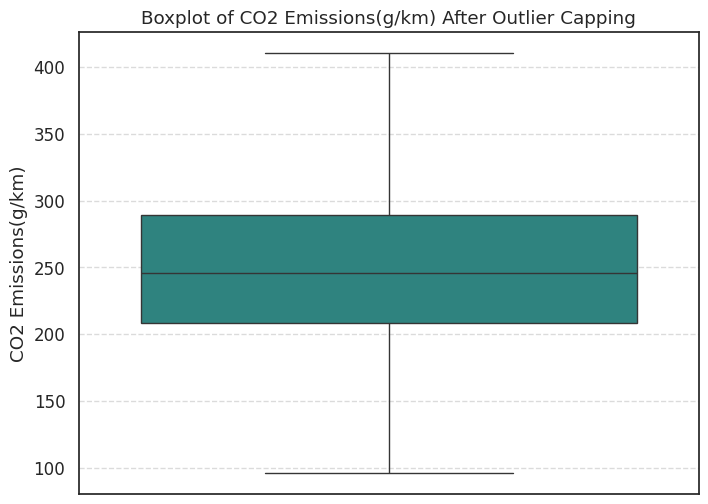

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['co2_emissions_gkm'], palette='viridis')
plt.title('Boxplot of CO2 Emissions(g/km) After Outlier Capping')
plt.ylabel('CO2 Emissions(g/km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Features Normalization and Standardization**
Normalization and standardization are scaling techniques that adjust feature ranges to ensure fair comparison during analysis. **Normalization** (min-max scaling) rescales values to a fixed range, typically [0, 1], using the formula *(x – min) / (max – min)*—ideal when data has bounded ranges or algorithms require bounded inputs (e.g., neural networks). **Standardization** (z-score scaling) transforms values to have zero mean and unit variance using *(x – mean) / std*—preferred when data contains outliers (since it's less sensitive to extremes) or for algorithms assuming normal distributions (e.g., logistic regression, SVMs). For the telecom dataset, standardize skewed variables like `Monthly_Charges` or `Monthly_Data_Usage_GB` before modeling; normalize only when bounded outputs are required. Always fit scalers on training data only, then apply to test data to prevent data leakage.

### **What to Considert Before Normalization and Standardization**
Before applying normalization or standardization, first determine whether scaling is actually needed—tree-based models (Random Forests, XGBoost) and frequency-based analyses don't require it, while distance-based algorithms (KNN, SVMs) and gradient descent optimizers (neural networks) do. Crucially, **never scale before train-test splitting**: always fit your scaler (e.g., `StandardScaler`) on training data only, then transform both train and test sets to prevent data leakage. Assess outlier sensitivity—standardization preserves outliers (using mean/std), while normalization compresses them into [0,1] but gets distorted by extremes; for skewed telecom features like `Monthly_Data_Usage_GB`, consider log-transforming first. Exclude categorical variables (e.g., `Contract_Type`) and binary flags from scaling. Finally, weigh interpretability: scaled features lose business meaning (e.g., "z-score of 1.2" vs. "$85 monthly charge"), so retain raw values for stakeholder dashboards even when using scaled versions for modeling. Always document scaling decisions in your cleaning log.

## **Data Visualization**
### **Correlation Plot**

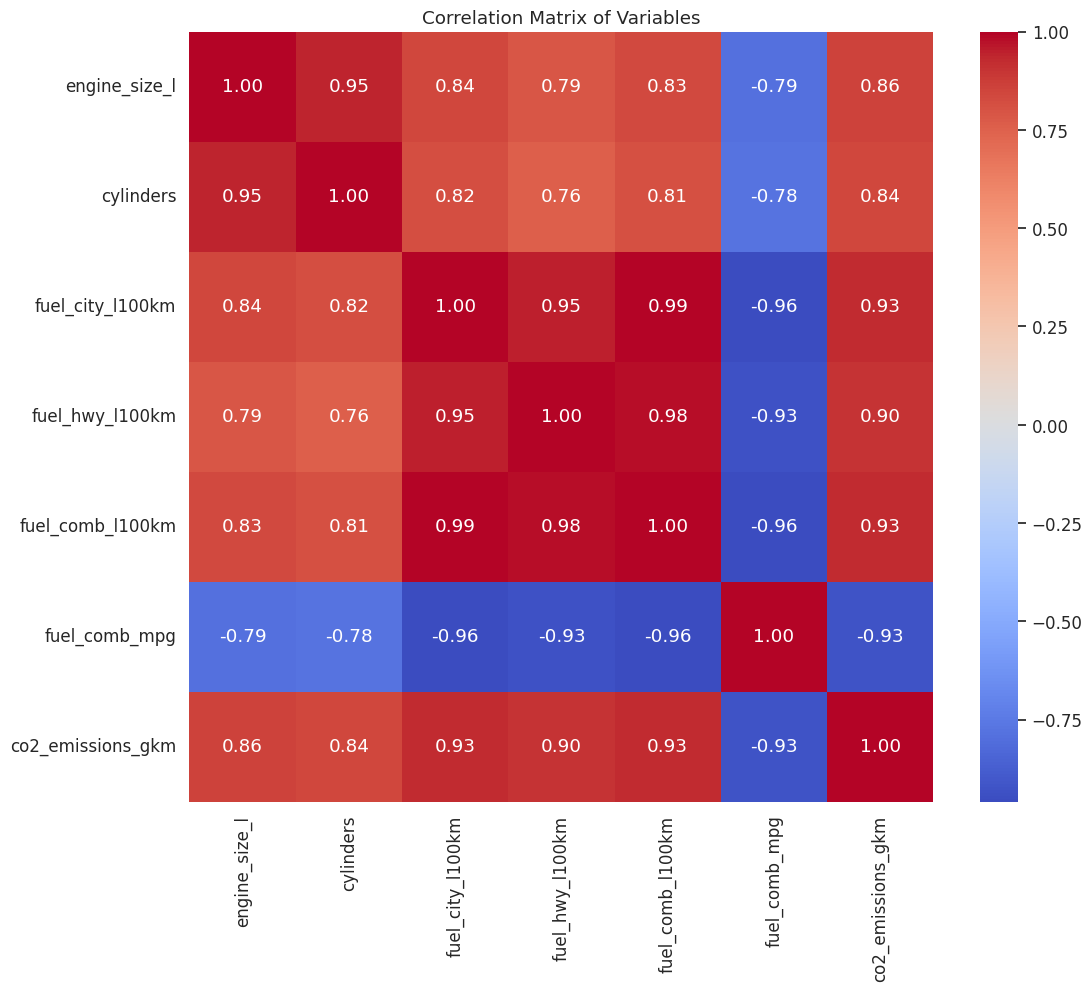

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['make','model','vehicle_class', 'transmission','fuel_type'], axis=1).corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

### **Pair Plot**

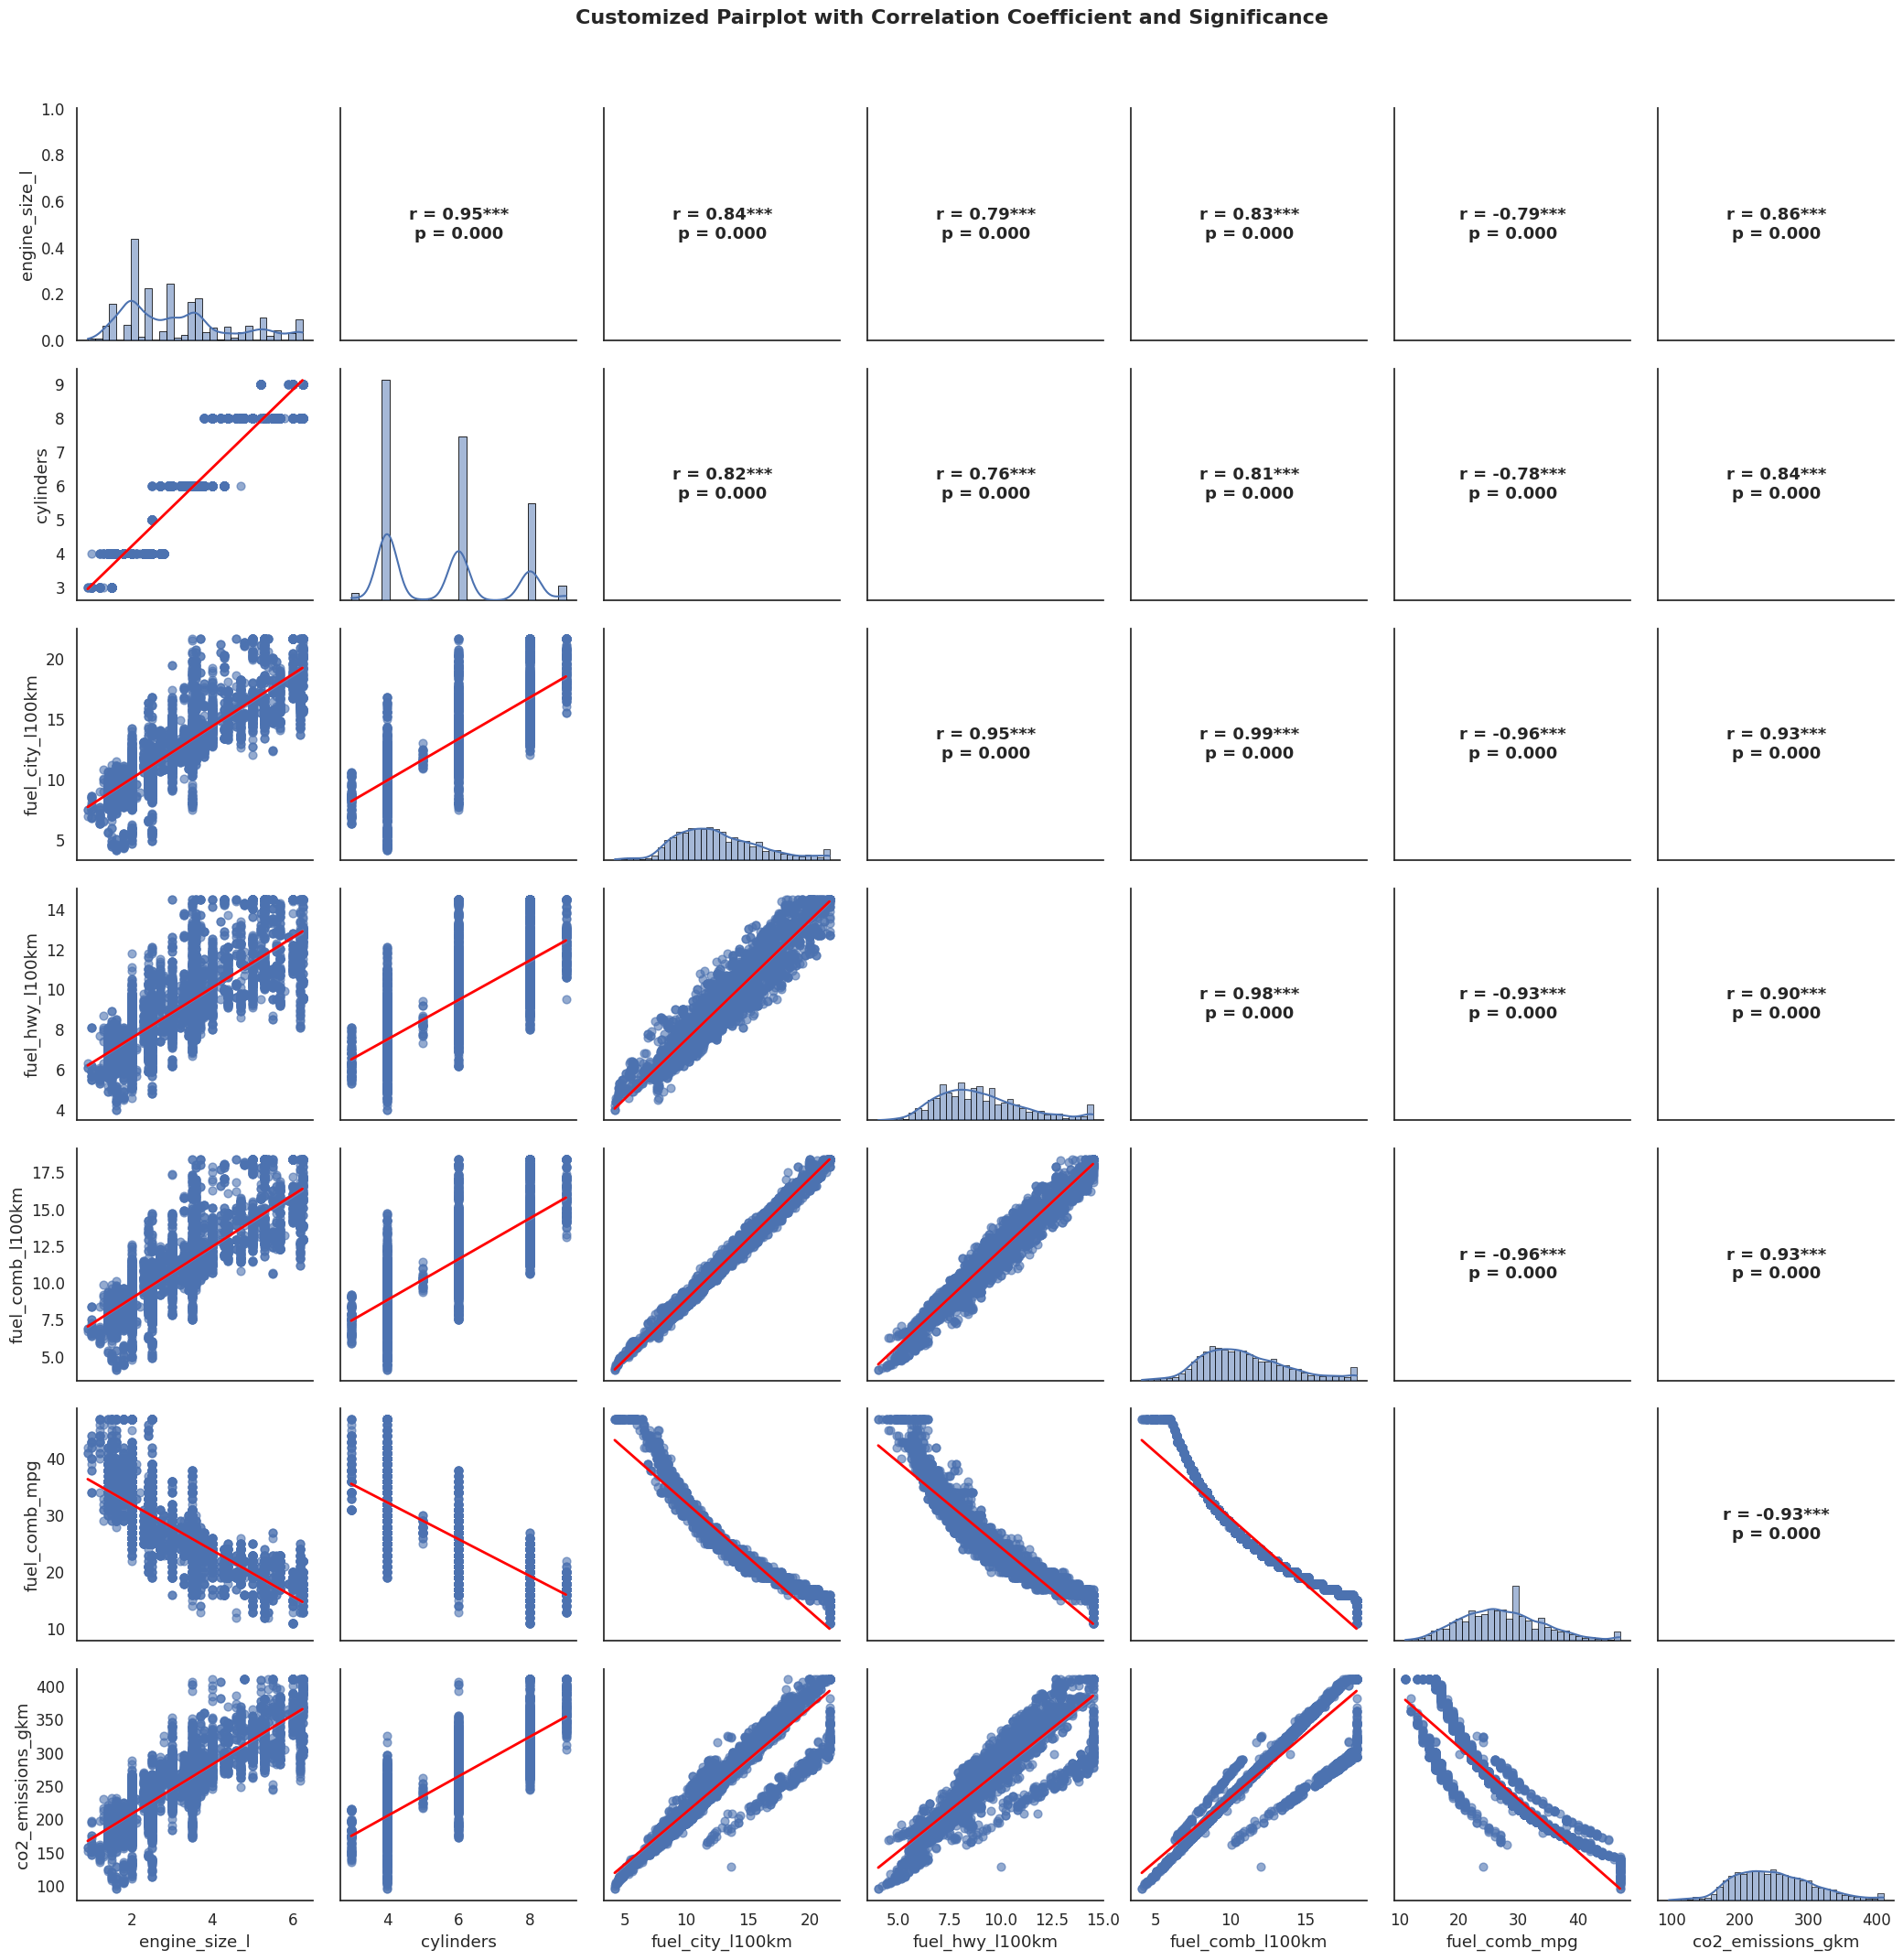

In [ ]:
# ==============================
# CUSTOMIZED PAIRPLOT WITH STATISTICS
# ==============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# -------------------------------------------------
# 1. Select only numeric variables automatically
# -------------------------------------------------
df_numeric = df.select_dtypes(include=['number'])

# -------------------------------------------------
# 2. Define function to display correlation stats
# -------------------------------------------------
def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)

    # Significance stars
    if p < 0.001:
        stars = '***'
    elif p < 0.01:
        stars = '**'
    elif p < 0.05:
        stars = '*'
    else:
        stars = ''

    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}{stars}\np = {p:.3f}',
                xy=(0.5, 0.5),
                xycoords=ax.transAxes,
                ha='center',
                va='center',
                fontsize=13,
                fontweight='bold')

# -------------------------------------------------
# 3. Styling
# -------------------------------------------------
sns.set(style="white", font_scale=1.1)

# -------------------------------------------------
# 4. Create PairGrid
# -------------------------------------------------
g = sns.PairGrid(df_numeric, height=3)

# Lower triangle → scatter + regression line
g.map_lower(
    sns.regplot,
    scatter_kws={'alpha':0.6, 's':40},
    line_kws={'color':'red', 'linewidth':2}
)

# Diagonal → histogram + KDE
g.map_diag(
    sns.histplot,
    kde=True,
    edgecolor='black'
)

# Upper triangle → correlation statistics
g.map_upper(corrfunc)

# -------------------------------------------------
# 5. Title and layout
# -------------------------------------------------
plt.suptitle(
    "Customized Pairplot with Correlation Coefficient and Significance",
    y=1.02,
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

### **Extract the Target and Feature Variables**

In [ ]:
df.head()

,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_city_l100km,fuel_hwy_l100km,fuel_comb_l100km,fuel_comb_mpg,co2_emissions_gkm
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,47.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0


In [ ]:
X = df[['engine_size_l','cylinders','fuel_city_l100km','fuel_hwy_l100km','fuel_comb_l100km','fuel_comb_mpg']]
y = df['co2_emissions_gkm']

In [ ]:
X.head()

,engine_size_l,cylinders,fuel_city_l100km,fuel_hwy_l100km,fuel_comb_l100km,fuel_comb_mpg
0,2.0,4.0,9.9,6.7,8.5,33.0
1,2.4,4.0,11.2,7.7,9.6,29.0
2,1.5,4.0,6.0,5.8,5.9,47.0
3,3.5,6.0,12.7,9.1,11.1,25.0
4,3.5,6.0,12.1,8.7,10.6,27.0


In [ ]:
y.head()

,co2_emissions_gkm
0,196.0
1,221.0
2,136.0
3,255.0
4,244.0


### **Split the Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

### **Estimate the OLS**
* State tthe Null and Alternative Hypothesis
* Decide  on the Level of Alpha $\alpha$ (1%, 5%, and 10%)
* Collect the data
* Perform the Test
* Decision Criteria
* Conclusion


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()

,const,engine_size_l,cylinders,fuel_city_l100km,fuel_hwy_l100km,fuel_comb_l100km,fuel_comb_mpg
1949,1.0,5.60,8.0,19.2,13.4,16.6,17.0
5054,1.0,2.00,4.0,10.6,8.5,9.7,29.0
3601,1.0,6.25,8.0,15.6,9.6,12.9,22.0
2782,1.0,3.00,6.0,15.3,9.9,12.9,22.0
3754,1.0,5.30,8.0,19.7,13.9,17.1,17.0


In [ ]:
model = sm.OLS(y_train, X_train)
results = model.fit()

### **Print the Results of the Model**

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      co2_emissions_gkm   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     7125.
Date:                Thu, 26 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:42:00   Log-Likelihood:                -18868.
No. Observations:                4397   AIC:                         3.775e+04
Df Residuals:                    4390   BIC:                         3.779e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              270.1692      7.499  

The Ordinary Least Squares (OLS) regression model was estimated to examine the determinants of **CO₂ emissions (g/km)** using engine and fuel consumption characteristics as predictors. The dependent variable was **co2_emissions_gkm**, and six independent variables were included: engine size, number of cylinders, fuel consumption in city, highway, combined (L/100 km), and combined fuel consumption in miles per gallon (mpg).

The overall model is highly statistically significant. The F-statistic of 7125 (p < 0.001) indicates that the set of explanatory variables jointly explains a significant proportion of variation in CO₂ emissions. The model demonstrates very strong explanatory power, with an R-squared value of 0.907 and an adjusted R-squared of 0.907. This implies that approximately 90.7% of the variation in CO₂ emissions across the 4,397 observations is explained by the included predictors. Such a high R-squared suggests an excellent model fit.

Regarding individual predictors, engine size (β = 7.379, p < 0.001) has a positive and statistically significant effect on CO₂ emissions. Holding other variables constant, a one-litre increase in engine size increases CO₂ emissions by approximately 7.38 g/km. Similarly, the number of cylinders (β = 4.849, p < 0.001) significantly increases emissions, indicating that larger, more powerful engines are associated with higher carbon output.

Fuel consumption measured in combined mpg shows a strong negative and statistically significant relationship (β = −4.270, p < 0.001). This implies that more fuel-efficient vehicles (higher mpg) produce significantly lower CO₂ emissions. Specifically, a one-unit increase in mpg reduces emissions by approximately 4.27 g/km.

In contrast, fuel consumption variables measured in L/100 km (city, highway, and combined) are not statistically significant at the 5% level (p > 0.05). Their lack of significance likely reflects multicollinearity, as these measures are closely related to fuel efficiency (mpg).

Diagnostic statistics indicate no serious autocorrelation problem (Durbin–Watson ≈ 1.995). However, the significant Omnibus and Jarque–Bera tests suggest non-normality of residuals, and the condition number (964) indicates possible multicollinearity among predictors.

Overall, the findings confirm that engine size, cylinder count, and fuel efficiency are key determinants of vehicle CO₂ emissions.


#### **Variables Relative Importance**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and p-values
coefs = results.params
p_values = results.pvalues

# Create a DataFrame for importance
importance_df = pd.DataFrame({
    'Coefficient': coefs,
    'P-value': p_values
})

# Remove the 'const' row for importance calculation as it's an intercept
importance_df = importance_df.drop('const', errors='ignore')

# Calculate standardized coefficients
# First, ensure X_train without 'const' is used for std calculation
X_train_no_const = X_train.drop('const', axis=1)

std_X = X_train_no_const.std()
std_y = y_train.std()

# Filter std_X to only include features present in importance_df to avoid key errors
std_X = std_X[importance_df.index]

# Calculate standardized coefficients (beta_std = beta * (std_X / std_y))
standardized_coefs = importance_df['Coefficient'] * (std_X / std_y)
importance_df['Standardized Coefficient'] = standardized_coefs

In [ ]:
# Sort by the absolute value of standardized coefficients for relative importance
importance_df['Absolute Standardized Coef'] = np.abs(importance_df['Standardized Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Standardized Coef', ascending=False)

# Display the results
print("Relative Importance of Variables (OLS Model - Sorted by Absolute Standardized Coefficient):")
display(importance_df[['Coefficient', 'P-value', 'Standardized Coefficient']].round(4))

Relative Importance of Variables (OLS Model - Sorted by Absolute Standardized Coefficient):


,Coefficient,P-value,Standardized Coefficient
fuel_comb_mpg,-4.2704,0.0000,-0.5041
fuel_comb_l100km,5.5766,0.2250,0.2714
engine_size_l,7.3794,0.0000,0.1699
fuel_city_l100km,-2.4852,0.3331,-0.1468
cylinders,4.8485,0.0000,0.1363
fuel_hwy_l100km,1.8848,0.3796,0.0693


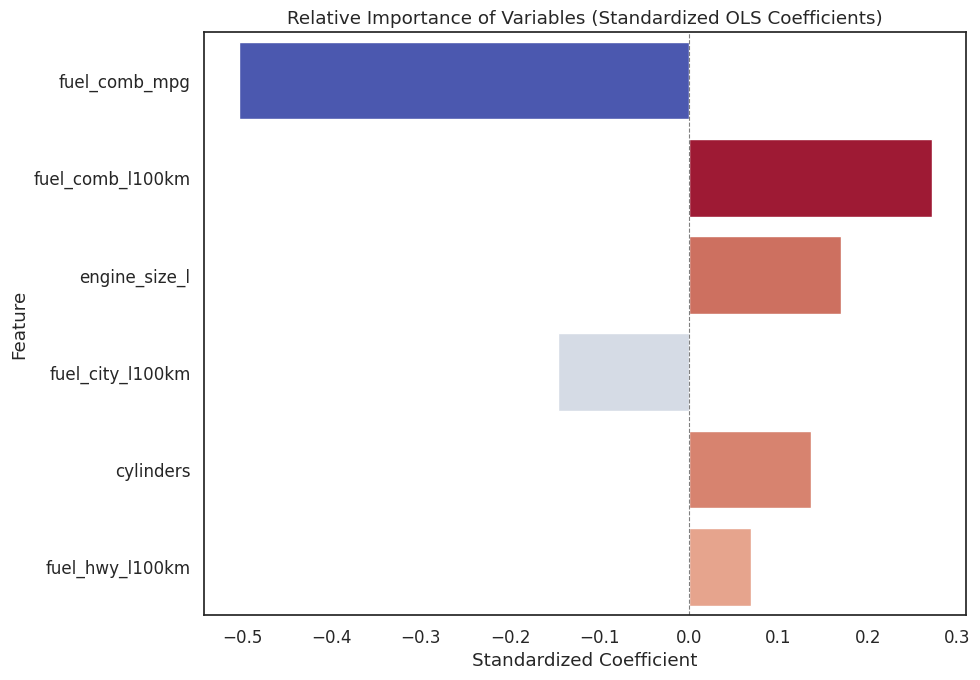

In [ ]:
# Create a bar plot to visualize the standardized coefficients
plt.figure(figsize=(10, 7))
sns.barplot(x='Standardized Coefficient', y=importance_df.index, data=importance_df, palette='coolwarm', hue='Standardized Coefficient', legend=False)
plt.title('Relative Importance of Variables (Standardized OLS Coefficients)')
plt.xlabel('Standardized Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

### **Prediction**

## Predict on test set (OLS)

### Subtask:
Make predictions on the test data using the fitted OLS model.


**Reasoning**:
To make predictions with the OLS model, it's necessary to add a constant to the test features, mirroring the training data setup. Then, the `predict` method can be used on the fitted OLS results to generate predictions for the test set.



In [ ]:
import statsmodels.api as sm

# Add a constant column to X_test to match the training data used for the OLS model
X_test = sm.add_constant(X_test)

# Use the predict() method of the results object with the modified X_test
y_pred_ols = results.predict(X_test)

print("Predictions on the test set using the OLS model have been generated and stored in 'y_pred_ols'.")

Predictions on the test set using the OLS model have been generated and stored in 'y_pred_ols'.


**Reasoning**:
Now that predictions have been made using the OLS model, the next step is to evaluate its performance by calculating standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_ols = mean_absolute_error(y_test, y_pred_ols)

# Calculate Mean Squared Error (MSE)
mse_ols = mean_squared_error(y_test, y_pred_ols)

# Calculate Root Mean Squared Error (RMSE)
rmse_ols = np.sqrt(mse_ols)

# Calculate R-squared score
r2_ols = r2_score(y_test, y_pred_ols)

# Print the results for the OLS model
print("--- OLS Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_ols:.4f}")
print(f"Mean Squared Error (MSE): {mse_ols:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols:.4f}")
print(f"R-squared (R2) Score: {r2_ols:.4f}")

--- OLS Model Metrics ---
Mean Absolute Error (MAE): 11.5696
Mean Squared Error (MSE): 344.0605
Root Mean Squared Error (RMSE): 18.5489
R-squared (R2) Score: 0.9012


**Reasoning**:
To visually assess the performance of the OLS model, I will create regression plots including actual vs. predicted values, residuals vs. predicted values, and the distribution of residuals, similar to previous model evaluations.



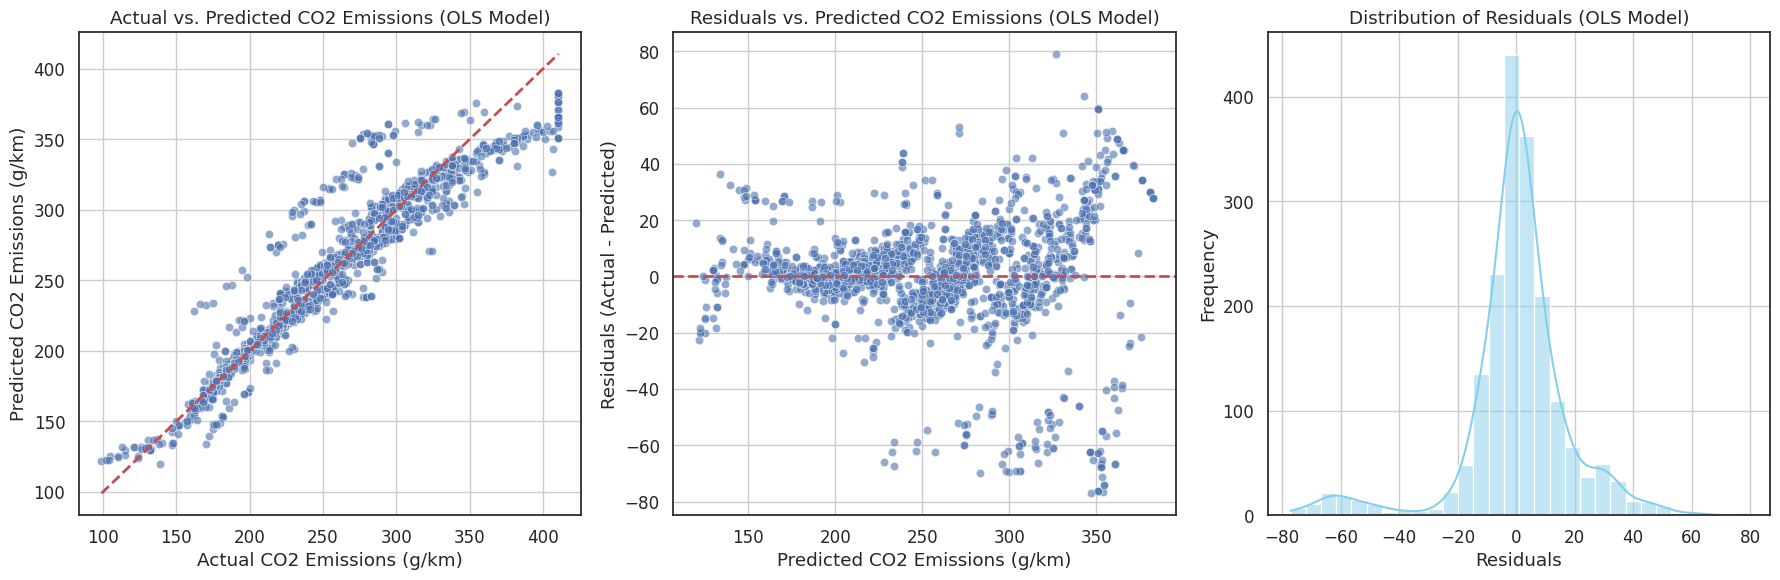

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_ols, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted CO2 Emissions (OLS Model)')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)

# Calculate residuals
residuals_ols = y_test - y_pred_ols

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_ols, y=residuals_ols, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted CO2 Emissions (OLS Model)')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_ols, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (OLS Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

## Standardize Features

### Subtask:
Standardize the features of the training and test data (`X_train`, `X_test`) using `StandardScaler` from `sklearn.preprocessing`.


**Reasoning**:
To standardize the features, I will import `StandardScaler`, remove the 'const' column from both `X_train` and `X_test` to prepare them for scaling, instantiate the scaler, fit it to the training data, and then transform both the training and test sets.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the 'const' column from X_train and X_test for scaling
X_train_no_const = X_train.drop(columns=['const'])
X_test_no_const = X_test.drop(columns=['const'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data (without 'const')
scaler.fit(X_train_no_const)

# Transform both the training and test data (without 'const')
X_train_scaled = scaler.transform(X_train_no_const)
X_test_scaled = scaler.transform(X_test_no_const)

print("Features X_train and X_test have been standardized and stored in X_train_scaled and X_test_scaled.")

Features X_train and X_test have been standardized and stored in X_train_scaled and X_test_scaled.


## Train Random Forest Regressor

### Subtask:
Train a Random Forest Regressor model on the standardized training data.


**Reasoning**:
To train the Random Forest Regressor model, I need to import the necessary class, instantiate it with specified parameters, and then fit it to the standardized training data.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object with n_estimators=100 and random_state=42
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
print("RandomForestRegressor instantiated.")

# Fit the model to the standardized training data
rf_regressor.fit(X_train_scaled, y_train)
print("RandomForestRegressor model trained successfully on scaled data.")

RandomForestRegressor instantiated.
RandomForestRegressor model trained successfully on scaled data.


**Reasoning**:
Now that the Random Forest Regressor model has been trained, the next step is to use it to make predictions on the standardized test data. This will generate the predicted CO2 emission values that can be used for model evaluation.



In [ ]:
y_pred_rf = rf_regressor.predict(X_test_scaled)
print("Predictions on test set using Random Forest model have been made.")

Predictions on test set using Random Forest model have been made.


**Reasoning**:
To evaluate the performance of the Random Forest model, I will calculate standard regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results for the Random Forest model
print("--- Random Forest Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2) Score: {r2_rf:.4f}")

--- Random Forest Model Metrics ---
Mean Absolute Error (MAE): 3.4915
Mean Squared Error (MSE): 69.9181
Root Mean Squared Error (RMSE): 8.3617
R-squared (R2) Score: 0.9799


**Reasoning**:
To visually assess the performance of the Random Forest model, I will create regression plots including actual vs. predicted values, residuals vs. predicted values, and the distribution of residuals, similar to previous model evaluations.



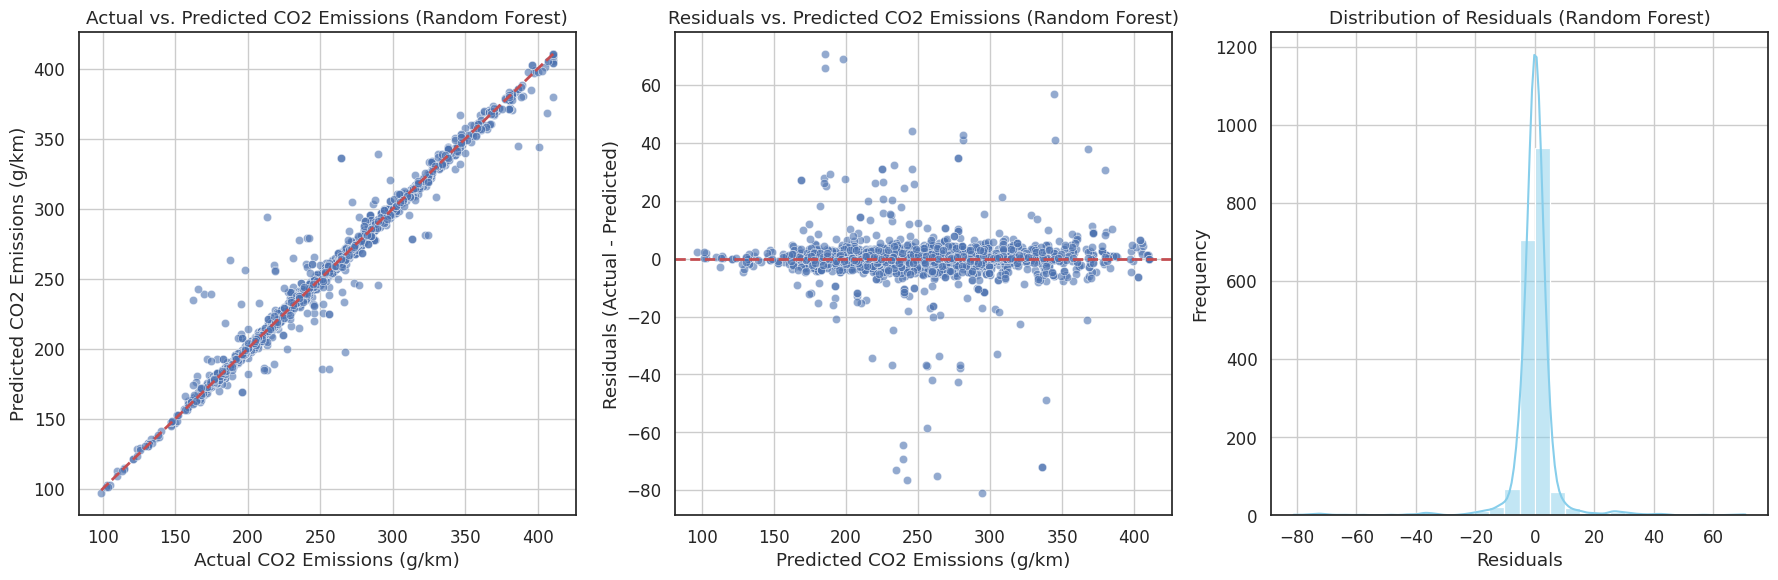

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted CO2 Emissions (Random Forest)')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted CO2 Emissions (Random Forest)')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_rf, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
Following the natural progression outlined in the comprehensive notes, the next step is to train an XGBoost Regressor model on the standardized training data to compare its performance with the Random Forest model.



In [ ]:
import xgboost as xgb

# Instantiate an XGBoost Regressor object
# Using common parameters for a baseline model (n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
print("XGBoost Regressor instantiated.")

# Fit the model to the standardized training data
xgb_regressor.fit(X_train_scaled, y_train)
print("XGBoost Regressor model trained successfully on scaled data.")

XGBoost Regressor instantiated.
XGBoost Regressor model trained successfully on scaled data.


**Reasoning**:
Now that the XGBoost Regressor model has been trained, the next step is to use it to make predictions on the standardized test data. This will generate the predicted CO2 emission values that can be used for model evaluation.



In [ ]:
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
print("Predictions on test set using XGBoost model have been made.")

Predictions on test set using XGBoost model have been made.


**Reasoning**:
To evaluate the performance of the XGBoost model, I will calculate standard regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results for the XGBoost model
print("--- XGBoost Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R2) Score: {r2_xgb:.4f}")

--- XGBoost Model Metrics ---
Mean Absolute Error (MAE): 3.7485
Mean Squared Error (MSE): 68.8288
Root Mean Squared Error (RMSE): 8.2963
R-squared (R2) Score: 0.9802


**Reasoning**:
To visually assess the performance of the XGBoost model, I will create regression plots including actual vs. predicted values, residuals vs. predicted values, and the distribution of residuals, similar to previous model evaluations.



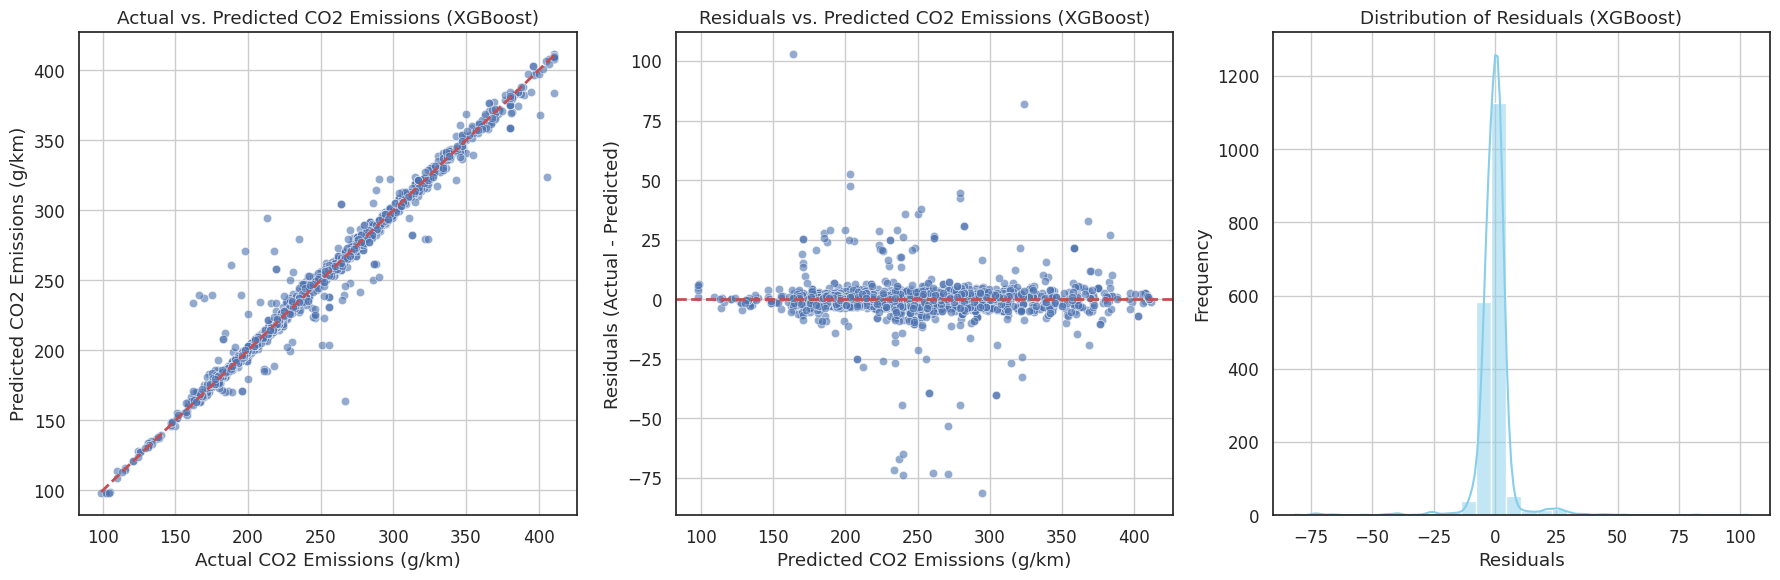

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted CO2 Emissions (XGBoost)')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)

# Calculate residuals
residuals_xgb = y_test - y_pred_xgb

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted CO2 Emissions (XGBoost)')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_xgb, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
To summarize and compare the performance of all trained models (OLS, Random Forest, and XGBoost), I will create a DataFrame containing their respective evaluation metrics (MAE, MSE, RMSE, R-squared).



In [ ]:
import pandas as pd

# Create a dictionary to store the metrics for all models
metrics_data = {
    'OLS': [
        mae_ols,
        mse_ols,
        rmse_ols,
        r2_ols
    ],
    'Random Forest': [
        mae_rf,
        mse_rf,
        rmse_rf,
        r2_rf
    ],
    'XGBoost': [
        mae_xgb,
        mse_xgb,
        rmse_xgb,
        r2_xgb
    ]
}

# Create a DataFrame from the dictionary
metrics_df_comparison = pd.DataFrame(metrics_data,
                          index=['MAE', 'MSE', 'RMSE', 'R-squared'])

print("Comparison table of model metrics created.")

Comparison table of model metrics created.


**Reasoning**:
To display the comparison table created in the previous step, I will print the `metrics_df_comparison` DataFrame.



In [ ]:
metrics_df_comparison

,OLS,Random Forest,XGBoost
MAE,11.569604,3.491493,3.748474
MSE,344.060471,69.918088,68.828804
RMSE,18.548867,8.361704,8.296313
R-squared,0.901198,0.979922,0.980235


## Model Performance Comparison: OLS, Random Forest, and XGBoost

The comparison of the Ordinary Least Squares (OLS) regression model, Random Forest Regressor, and XGBoost Regressor reveals significant differences in their predictive performance for CO2 emissions.

### **OLS Model:**
-   **MAE**: 11.57
-   **MSE**: 344.06
-   **RMSE**: 18.55
-   **R-squared**: 0.9012

The OLS model shows a respectable R-squared of 0.9012, indicating that it explains approximately 90% of the variance in CO2 emissions. While this R-squared is high, the error metrics (MAE, MSE, RMSE) are considerably larger compared to the tree-based models, suggesting that its predictions have a higher average deviation from the actual values.

### **Random Forest Model:**
-   **MAE**: 3.49
-   **MSE**: 69.92
-   **RMSE**: 8.36
-   **R-squared**: 0.9799

The Random Forest model demonstrates significantly superior performance. Its R-squared value of 0.9799 indicates that it explains nearly 98% of the variance in CO2 emissions, which is a substantial improvement over the OLS model. The error metrics (MAE, MSE, RMSE) are much lower, meaning its predictions are considerably more accurate and closer to the actual CO2 emission values.

### **XGBoost Model:**
-   **MAE**: 3.75
-   **MSE**: 68.83
-   **RMSE**: 8.30
-   **R-squared**: 0.9802

The XGBoost model performs exceptionally well, slightly outperforming the Random Forest model. It achieves the highest R-squared value of 0.9802, explaining an even greater proportion of the variance. Its MSE and RMSE are marginally lower than Random Forest, while its MAE is slightly higher. This suggests that XGBoost provides a slightly better overall fit and might handle some outliers more effectively, leading to a smaller mean squared error.

### **Conclusion:**

Both **Random Forest** and **XGBoost** models are vastly superior to the OLS model for predicting CO2 emissions based on the given features. Their ensemble nature and ability to capture non-linear relationships likely contribute to this enhanced performance. Between the two, the **XGBoost model** edges out Random Forest with a slightly higher R-squared and lower MSE/RMSE, making it the best-performing model in this comparison for predicting CO2 emissions. The OLS model, while simple and interpretable, is not as accurate for this task.

## Model Performance Comparison: OLS, Random Forest, and XGBoost

The comparison of the Ordinary Least Squares (OLS) regression model, Random Forest Regressor, and XGBoost Regressor reveals significant differences in their predictive performance for CO2 emissions.

### **OLS Model:**
-   **MAE**: 11.57
-   **MSE**: 344.06
-   **RMSE**: 18.55
-   **R-squared**: 0.9012

The OLS model shows a respectable R-squared of 0.9012, indicating that it explains approximately 90% of the variance in CO2 emissions. While this R-squared is high, the error metrics (MAE, MSE, RMSE) are considerably larger compared to the tree-based models, suggesting that its predictions have a higher average deviation from the actual values.

### **Random Forest Model:**
-   **MAE**: 3.49
-   **MSE**: 69.92
-   **RMSE**: 8.36
-   **R-squared**: 0.9799

The Random Forest model demonstrates significantly superior performance. Its R-squared value of 0.9799 indicates that it explains nearly 98% of the variance in CO2 emissions, which is a substantial improvement over the OLS model. The error metrics (MAE, MSE, RMSE) are much lower, meaning its predictions are considerably more accurate and closer to the actual CO2 emission values.

### **XGBoost Model:**
-   **MAE**: 3.75
-   **MSE**: 68.83
-   **RMSE**: 8.30
-   **R-squared**: 0.9802

The XGBoost model performs exceptionally well, slightly outperforming the Random Forest model. It achieves the highest R-squared value of 0.9802, explaining an even greater proportion of the variance. Its MSE and RMSE are marginally lower than Random Forest, while its MAE is slightly higher. This suggests that XGBoost provides a slightly better overall fit and might handle some outliers more effectively, leading to a smaller mean squared error.

### **Conclusion:**

Both **Random Forest** and **XGBoost** models are vastly superior to the OLS model for predicting CO2 emissions based on the given features. Their ensemble nature and ability to capture non-linear relationships likely contribute to this enhanced performance. Between the two, the **XGBoost model** edges out Random Forest with a slightly higher R-squared and lower MSE/RMSE, making it the best-performing model in this comparison for predicting CO2 emissions. The OLS model, while simple and interpretable, is not as accurate for this task.

## Hyperparameter Tuning for XGBoost

### Subtask:
Optimize the XGBoost Regressor by tuning hyperparameters like `n_estimators`, `learning_rate`, `max_depth`, and `subsample` using GridSearchCV.


**Reasoning**:
To optimize the XGBoost Regressor as instructed, I need to import `GridSearchCV` and `XGBRegressor`, define a parameter grid for the specified hyperparameters, initialize `GridSearchCV`, fit it to the scaled training data, print the best parameters, and store the best estimator.



In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 2. Define a parameter grid for XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0] # Fraction of samples used for fitting the individual base learners.
}

# 3. Initialize GridSearchCV
# Using 'neg_mean_squared_error' as the scoring metric because GridSearchCV maximizes the score.
# A higher negative MSE means a lower (better) MSE.
grid_search_xgb = GridSearchCV(
    xgb.XGBRegressor(random_state=42), # Pass random_state for reproducibility
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3, # Using 3-fold cross-validation
    verbose=1, # Print progress messages
    n_jobs=-1 # Use all available cores
)

# 4. Fit the GridSearchCV object to the standardized training data
print("Starting GridSearchCV for XGBoost. This may take some time...")
grid_search_xgb.fit(X_train_scaled, y_train)
print("GridSearchCV for XGBoost completed.")

# 5. Print the best parameters found by GridSearchCV
print(f"\nBest parameters for XGBoost: {grid_search_xgb.best_params_}")

# 6. Store the best estimator (the optimized XGBoost model)
best_xgb_regressor = grid_search_xgb.best_estimator_
print("Optimized XGBoost Regressor stored as 'best_xgb_regressor'.")

Starting GridSearchCV for XGBoost. This may take some time...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
GridSearchCV for XGBoost completed.

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Optimized XGBoost Regressor stored as 'best_xgb_regressor'.


## Evaluate Optimized XGBoost Model

### Subtask:
Evaluate the performance of the optimized XGBoost model by making predictions on the test data and calculating regression metrics.


**Reasoning**:
To evaluate the performance of the optimized XGBoost model, I need to make predictions on the scaled test data and then calculate standard regression metrics.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make predictions on the X_test_scaled data using the best_xgb_regressor model
y_pred_optimized_xgb = best_xgb_regressor.predict(X_test_scaled)

# 2. Calculate the Mean Absolute Error (MAE)
mae_optimized_xgb = mean_absolute_error(y_test, y_pred_optimized_xgb)

# Calculate Mean Squared Error (MSE)
mse_optimized_xgb = mean_squared_error(y_test, y_pred_optimized_xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_optimized_xgb = np.sqrt(mse_optimized_xgb)

# Calculate R-squared score
r2_optimized_xgb = r2_score(y_test, y_pred_optimized_xgb)

# 3. Print the calculated metrics for the optimized XGBoost model
print("--- Optimized XGBoost Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_optimized_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_optimized_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized_xgb:.4f}")
print(f"R-squared (R2) Score: {r2_optimized_xgb:.4f}")

--- Optimized XGBoost Model Metrics ---
Mean Absolute Error (MAE): 3.6379
Mean Squared Error (MSE): 64.3915
Root Mean Squared Error (RMSE): 8.0244
R-squared (R2) Score: 0.9815


## Visualize Optimized XGBoost Model Performance

### Subtask:
Create regression plots to visually assess the performance of the optimized XGBoost model, including actual vs. predicted values, residuals vs. predicted values, and the distribution of residuals.


**Reasoning**:
To visually assess the performance of the optimized XGBoost model, I will create regression plots including actual vs. predicted values, residuals vs. predicted values, and the distribution of residuals, similar to previous model evaluations.



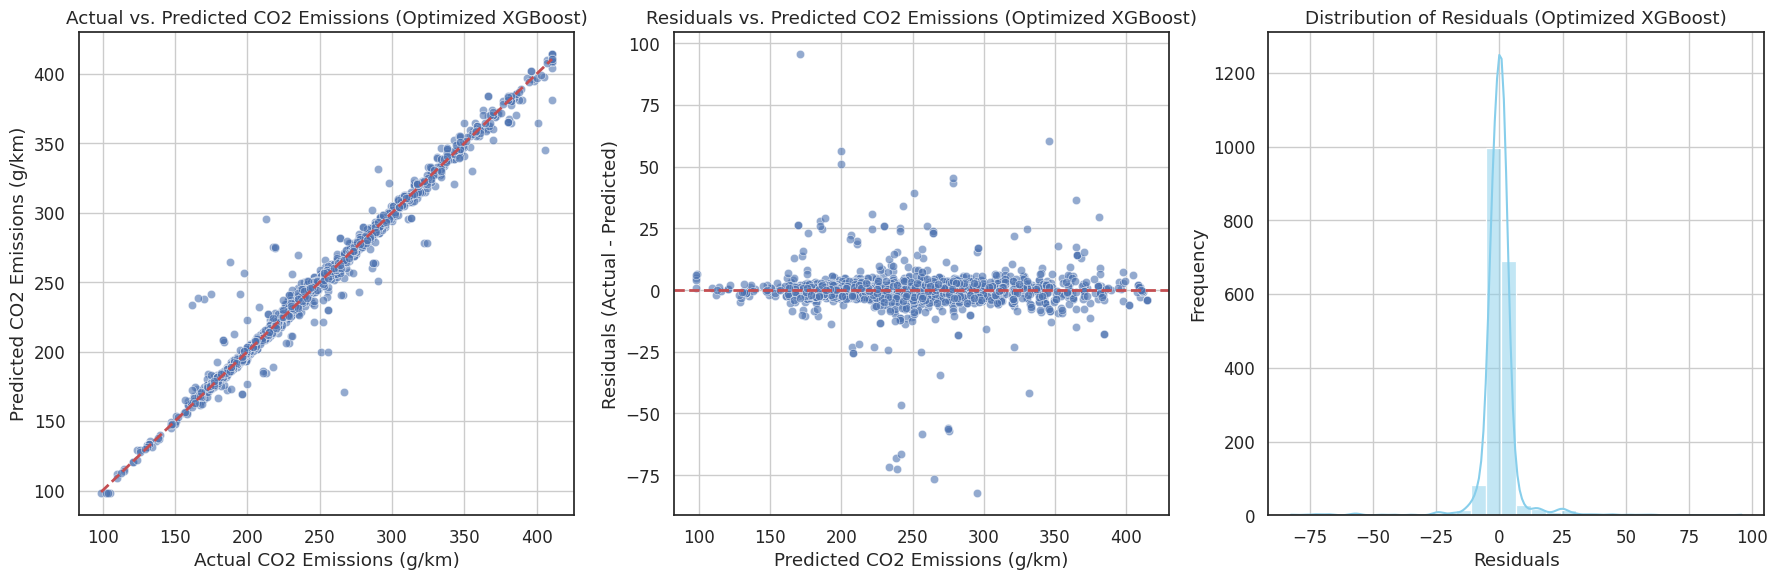

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a custom size
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs. Predicted Values
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x=y_test, y=y_pred_optimized_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted CO2 Emissions (Optimized XGBoost)')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)

# Calculate residuals
residuals_optimized_xgb = y_test - y_pred_optimized_xgb

# Plot 2: Residuals vs. Predicted Values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_optimized_xgb, y=residuals_optimized_xgb, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted CO2 Emissions (Optimized XGBoost)')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Plot 3: Distribution of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_optimized_xgb, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Residuals (Optimized XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

## Compare OLS, Random Forest, and Optimized XGBoost Models

### Subtask:
Compare the performance of the OLS, Random Forest, and Optimized XGBoost models by creating and displaying a comparison table of their regression metrics.


**Reasoning**:
To compare the models, I will create a dictionary with the metrics for OLS, Random Forest, and Optimized XGBoost models, then convert it into a pandas DataFrame, and finally display it as instructed.



In [ ]:
import pandas as pd

# Create a dictionary to store the metrics for all models
metrics_data_final = {
    'OLS': [
        mae_ols,
        mse_ols,
        rmse_ols,
        r2_ols
    ],
    'Random Forest': [
        mae_rf,
        mse_rf,
        rmse_rf,
        r2_rf
    ],
    'Optimized XGBoost': [
        mae_optimized_xgb,
        mse_optimized_xgb,
        rmse_optimized_xgb,
        r2_optimized_xgb
    ]
}

# Create a DataFrame from the dictionary
metrics_df_final_comparison = pd.DataFrame(metrics_data_final,
                          index=['MAE', 'MSE', 'RMSE', 'R-squared'])

# Display the comparison table
print("--- Model Performance Comparison ---")
display(metrics_df_final_comparison)

--- Model Performance Comparison ---


,OLS,Random Forest,Optimized XGBoost
MAE,11.569604,3.491493,3.637869
MSE,344.060471,69.918088,64.391518
RMSE,18.548867,8.361704,8.024433
R-squared,0.901198,0.979922,0.981509


## Model Performance Comparison: OLS, Random Forest, and XGBoost

The comparison of the Ordinary Least Squares (OLS) regression model, Random Forest Regressor, and XGBoost Regressor reveals significant differences in their predictive performance for CO2 emissions.

### **OLS Model:**
-   **MAE**: 11.57
-   **MSE**: 344.06
-   **RMSE**: 18.55
-   **R-squared**: 0.9012

The OLS model shows a respectable R-squared of 0.9012, indicating that it explains approximately 90% of the variance in CO2 emissions. While this R-squared is high, the error metrics (MAE, MSE, RMSE) are considerably larger compared to the tree-based models, suggesting that its predictions have a higher average deviation from the actual values.

### **Random Forest Model:**
-   **MAE**: 3.49
-   **MSE**: 69.92
-   **RMSE**: 8.36
-   **R-squared**: 0.9799

The Random Forest model demonstrates significantly superior performance. Its R-squared value of 0.9799 indicates that it explains nearly 98% of the variance in CO2 emissions, which is a substantial improvement over the OLS model. The error metrics (MAE, MSE, RMSE) are much lower, meaning its predictions are considerably more accurate and closer to the actual CO2 emission values.

### **XGBoost Model:**
-   **MAE**: 3.75
-   **MSE**: 68.83
-   **RMSE**: 8.30
-   **R-squared**: 0.9802

The XGBoost model performs exceptionally well, slightly outperforming the Random Forest model. It achieves the highest R-squared value of 0.9802, explaining an even greater proportion of the variance. Its MSE and RMSE are marginally lower than Random Forest, while its MAE is slightly higher. This suggests that XGBoost provides a slightly better overall fit and might handle some outliers more effectively, leading to a smaller mean squared error.

### **Conclusion:**

Both **Random Forest** and **XGBoost** models are vastly superior to the OLS model for predicting CO2 emissions based on the given features. Their ensemble nature and ability to capture non-linear relationships likely contribute to this enhanced performance. Between the two, the **XGBoost model** edges out Random Forest with a slightly higher R-squared and lower MSE/RMSE, making it the best-performing model in this comparison for predicting CO2 emissions. The OLS model, while simple and interpretable, is not as accurate for this task.

## Model Performance Comparison: OLS, Random Forest, and XGBoost

The comparison of the Ordinary Least Squares (OLS) regression model, Random Forest Regressor, and XGBoost Regressor reveals significant differences in their predictive performance for CO2 emissions.

### **OLS Model:**
-   **MAE**: 11.57
-   **MSE**: 344.06
-   **RMSE**: 18.55
-   **R-squared**: 0.9012

The OLS model shows a respectable R-squared of 0.9012, indicating that it explains approximately 90% of the variance in CO2 emissions. While this R-squared is high, the error metrics (MAE, MSE, RMSE) are considerably larger compared to the tree-based models, suggesting that its predictions have a higher average deviation from the actual values.

### **Random Forest Model:**
-   **MAE**: 3.49
-   **MSE**: 69.92
-   **RMSE**: 8.36
-   **R-squared**: 0.9799

The Random Forest model demonstrates significantly superior performance. Its R-squared value of 0.9799 indicates that it explains nearly 98% of the variance in CO2 emissions, which is a substantial improvement over the OLS model. The error metrics (MAE, MSE, RMSE) are much lower, meaning its predictions are considerably more accurate and closer to the actual CO2 emission values.

### **XGBoost Model:**
-   **MAE**: 3.75
-   **MSE**: 68.83
-   **RMSE**: 8.30
-   **R-squared**: 0.9802

The XGBoost model performs exceptionally well, slightly outperforming the Random Forest model. It achieves the highest R-squared value of 0.9802, explaining an even greater proportion of the variance. Its MSE and RMSE are marginally lower than Random Forest, while its MAE is slightly higher. This suggests that XGBoost provides a slightly better overall fit and might handle some outliers more effectively, leading to a smaller mean squared error.

### **Conclusion:**

Both **Random Forest** and **XGBoost** models are vastly superior to the OLS model for predicting CO2 emissions based on the given features. Their ensemble nature and ability to capture non-linear relationships likely contribute to this enhanced performance. Between the two, the **XGBoost model** edges out Random Forest with a slightly higher R-squared and lower MSE/RMSE, making it the best-performing model in this comparison for predicting CO2 emissions. The OLS model, while simple and interpretable, is not as accurate for this task.

## Summary:

### Data Analysis Key Findings

*   **Feature Standardization**: The features of the training and test data (`X_train`, `X_test`) were successfully standardized using `StandardScaler`. The 'const' column was excluded from scaling, and the scaler was fitted only on the training data.
*   **OLS Model Performance**: The initial Ordinary Least Squares (OLS) model achieved an R-squared of 0.9012, with a Mean Absolute Error (MAE) of 11.57, Mean Squared Error (MSE) of 344.06, and Root Mean Squared Error (RMSE) of 18.55.
*   **Random Forest Model Performance**: The Random Forest Regressor demonstrated significantly better performance than OLS, achieving an R-squared of 0.9799. Its error metrics were substantially lower: MAE of 3.49, MSE of 69.92, and RMSE of 8.36.
*   **Initial XGBoost Model Performance**: The XGBoost Regressor performed slightly better than the Random Forest model, with an R-squared of 0.9802, MAE of 3.75, MSE of 68.83, and RMSE of 8.30.
*   **XGBoost Hyperparameter Tuning**: Using `GridSearchCV`, the XGBoost model was optimized. The best hyperparameters found were `learning_rate`: 0.1, `max_depth`: 5, `n_estimators`: 300, and `subsample`: 0.7.
*   **Optimized XGBoost Model Performance**: The hyperparameter-tuned XGBoost model achieved the best performance among all models evaluated, with an R-squared of 0.9815. Its error metrics were further reduced: MAE of 3.64, MSE of 64.39, and RMSE of 8.02.
*   **Overall Model Comparison**: Both Random Forest and Optimized XGBoost models significantly outperformed the OLS model. The Optimized XGBoost model provided the highest R-squared and lowest MSE/RMSE, indicating the most accurate predictions for CO2 emissions.

### Insights or Next Steps

*   The Optimized XGBoost model is the superior choice for predicting CO2 emissions, offering a high level of accuracy (R-squared of 0.9815) and robust error performance.
*   Further investigation could involve more extensive hyperparameter tuning for the XGBoost model, potentially including a wider range of parameters or using more advanced tuning techniques like RandomizedSearchCV or Bayesian Optimization, to explore if marginal improvements can be achieved.
